In [1]:
import csv
import numpy as np 
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt 
import pickle
import statistics
import numpy as np  
import sys

pd.set_option('display.max_rows', 4000)
pd.set_option('display.max_columns', 200)

In [2]:
from langdetect import detect
from langdetect import DetectorFactory
DetectorFactory.seed = 0

In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

**Sentiment Analysis provided by Upasana - Tweets need to be cleaned prior to using.**


In [4]:
def sentiment_analyzer_score_for_englishOnlyTweet(cleaned_tweet): #this function takes in a tweet that has been detected as an english tweet
    score = analyser.polarity_scores(cleaned_tweet) #so this cleaned_tweet is always an english tweet.
    lb = score['compound']
    return lb

**Read in list of users to analyze**

In [5]:
# df = pd.read_csv("/home/updu6059/Twint_Data/ParallelProcessing/Famous_Users/DidNotMentionBack_Users/Filtered_EnglishUsers_DidNotMentionedBackUsers_FINAL.csv")
# # temp2D = pd.read_csv(, low_memory=False)

# # df = pd.read_csv('Filtered_EnglishUsers_DidnotMentionBackUsers.csv')
# UserList = list(df['Users'])

In [6]:
df = pd.read_csv("/home/updu6059/Twint_Data/ParallelProcessing/Famous_Users/DidNotMentionBack_Users/Filtered_EnglishUsers_DidNotMentionedBackUsers_FINAL.csv")
# temp2D = pd.read_csv(, low_memory=False)

# df = pd.read_csv('Filtered_EnglishUsers_DidnotMentionBackUsers.csv')
NonResponsiveUserList = list(df['Users'])

df = pd.read_csv('Filtered_EnglishUsers_DidnotMentionBackUsers.csv')
UserList = list(df['Users'])

for i in range(len(UserList)):
    NonResponsiveUserList.append(UserList[i])


In [7]:
all_user_lists=[
    "/home/updu6059/Twint_Data/ParallelProcessing/Famous_Users/DidNotMentionBack_Users/Filtered_EnglishUsers_DidNotMentionedBackUsers_FINAL.csv",
    "/home/updu6059/Twint_Data/ParallelProcessing/Famous_Users/MentionedBack_Users/Filtered_EnglishUsers_MentionedBackUsers_FINAL.csv",
    'Filtered_EnglishUsers_DidnotMentionBackUsers.csv',
    'Filtered_EnglishUsers_MentionBackedUsers.csv']

UserList = []
userPathDict = {}
for i in range(4):  
    df = pd.read_csv(all_user_lists[i])
    tempUserList = list(df['Users'])
    for j in range(len(tempUserList)):
        UserList.append(tempUserList[j])
        if (i == 0) : userPathDict[tempUserList[j]] = '/home/updu6059/Twint_Data/ParallelProcessing/Famous_Users/User_Data/English_Only_Tweets/'
        elif (i == 1) : userPathDict[tempUserList[j]] = '/home/updu6059/Twint_Data/ParallelProcessing/Famous_Users/User_Data/English_Only_Tweets/'
        elif (i == 2) : userPathDict[tempUserList[j]] = '/home/updu6059/Twint_Data/ParallelProcessing/OnlyEnglishTweets/'
        elif (i == 3) : userPathDict[tempUserList[j]] = '/home/updu6059/Twint_Data/ParallelProcessing/OnlyEnglishTweets/'
    

In [8]:
UserList = ['rustyrockets',
 'mtaibbi',
 'reba',
 'marclamonthill',
 'Liz_Wheeler',
 'islamicthought',
 'ABC7NY',
 'France24_en',
 'rustyrockets',
 'mtaibbi',
 'reba',
 'marclamonthill',
 'Liz_Wheeler',
 'islamicthought',
 'ABC7NY',
 'France24_en',
 'islamicthought',
 'ABC7NY',
 'France24_en',
 'islamicthought',
 'ABC7NY',
 'France24_en',
 'FoxNews',
 'runnersworld',
 'PeterSchiff',
 'TechCrunch',
 'jtimberlake',
 'InspiringThinkn',
 'ggreenwald',
 'KellyO',
 'BoyGeorge',
 'Timcast',
 'MichaelSkolnik',
 'JasonMillerinDC',
 'derekhough',
 'HouseGOP',
 'myfabolouslife',
 'victoriabeckham',
 'BettyBowers',
 'MensHealthMag',
 'RT_America',
 'KurtSchlichter',
 'joshrogin',
 'KrisJenner',
 'TwitterGov',
 'OfficialMelB',
 'ABCWorldNews',
 'flightradar24',
 'ABC7NY',
 'France24_en',
 'ABC7NY',
 'France24_en',
 'rustyrockets',
 'mtaibbi',
 'reba',
 'marclamonthill',
 'Liz_Wheeler',
 'islamicthought',
 'ABC7NY',
 'France24_en',
 'FoxNews',
 'runnersworld',
 'PeterSchiff',
 'TechCrunch',
 'jtimberlake',
 'InspiringThinkn',
 'ggreenwald',
 'KellyO',
 'BoyGeorge',
 'Timcast',
 'MichaelSkolnik',
 'JasonMillerinDC',
 'derekhough',
 'HouseGOP',
 'myfabolouslife',
 'victoriabeckham',
 'BettyBowers',
 'MensHealthMag',
 'RT_America',
 'KurtSchlichter',
 'joshrogin',
 'KrisJenner',
 'TwitterGov',
 'OfficialMelB',
 'ABCWorldNews',
 'flightradar24',
 'JedediahBila',
 'MariaSharapova',
 'SportsCenter',
 'JeffFlake',
 'AJEnglish',
 'Tom_Bergeron',
 'greta',
 'KatTimpf',
 'wyclef',
 'RiceGum',
 'edhelms',
 'AnonPress',
 'SkyNews',
 'LindseyGrahamSC',
 'SharylAttkisson',
 'trailblazers',
 'OnionSports',
 'RobBrydon',
 'DailyMail',
 'ENERGY',
 'JoelMadden',
 'OK_Magazine',
 'CLewandowski_',
 'maziehirono',
 'SenBobCasey',
 'JonahDispatch',
 'HillaryClinton',
 'Telegraph',
 'SpeakerBoehner',
 'Gizmodo',
 'PittsburghPG',
 'WORLDSTAR',
 'rosemcgowan',
 'ananavarro',
 'Newsday',
 'steph93065',
 'kerrywashington',
 'Sarah_Hyland',
 'SenJeffMerkley',
 'PlayStation',
 'PattyMurray',
 'RevRunWisdom',
 'NolteNC',
 'Playboy',
 'newrepublic',
 'MeetThePress',
 'blakehounshell',
 'Comey',
 'JustJared',
 'RockChristopher',
 'BruceVH',
 'YNB',
 'SethAbramson',
 '2morrowknight',
 'nycjim',
 'JohnKasich',
 'davidschneider',
 'jasoninthehouse',
 'ThisWeekABC',
 'HeatherChilders',
 'LMKMovieManiac',
 'MaxBlumenthal',
 'TeaPainUSA',
 'vicenews',
 'SenatorCollins',
 'MPRnews',
 'NYTHealth',
 'MailOnline',
 'chrislhayes',
 'the_USO',
 'SirPatStew',
 'maddow',
 'TheOfficerTatum',
 'realmadriden',
 'diggy_simmons',
 'CNET',
 'mitchellreports',
 'NYMag',
 'thejournal_ie',
 'i_D',
 'matthewamiller',
 'bennyjohnson',
 'TheEllenShow',
 'Eurovision',
 'Blavity',
 'nytpolitics',
 'ByronYork',
 'TomFitton',
 'CNNent',
 'airnewsalerts',
 'MarkSimoneNY',
 'DailyCaller',
 'gsuite',
 '60Minutes',
 'lhfang',
 'SenateGOP',
 'Drakee_YMCMB',
 'mkhammer',
 'bjpenndotcom',
 'senatemajldr',
 'FLOTUS44',
 'RVAwonk',
 'MattWalshBlog',
 'Acosta',
 'ScottAdamsSays',
 'HomeAdore',
 'LupeFiasco',
 'AnnCoulter',
 'TheTimMcGraw',
 'Caitlyn_Jenner',
 'vj44',
 'JamesMelville',
 'MusicLov3rzRdo',
 'KameronBennett',
 'KatrinaNation',
 'chuckwoolery',
 'LindaSuhler',
 'CNN',
 'MichelleObama',
 'NATO',
 'kellyoxford',
 'lisamurkowski',
 '9GAG',
 'benyt',
 'NYGovCuomo',
 'RyanSeacrest',
 'SenatorReid',
 'tedcruz',
 'brianstelter',
 'StephenMangan',
 'MikeTyson',
 'CNNBusiness',
 'GovChristie',
 'nycgov',
 'ItsDLS',
 'FreedomWorks',
 'LOLGOP',
 'RottenTomatoes',
 'Eminem',
 'ITV',
 'FRANCE24',
 'RealClearNews',
 'FifthHarmony',
 '20committee',
 'funnyordie',
 'NeNeLeakes',
 'VictoriaOsteen',
 'HuffPost',
 'samstein',
 'thedailybeast',
 'KChenoweth',
 'andersoncooper',
 'jimmykimmel',
 'StephenKing',
 'ChrisCuomo',
 'CassiniSaturn',
 'Bencjacobs',
 'nytimes',
 'VP44',
 'bjnovak',
 'Schwarzenegger',
 'McJesse',
 'amandaseales',
 'KenDilanianNBC',
 'RubinReport',
 'KellyOsbourne',
 'blakeshelton',
 'BuzzFeedNews',
 'Cosmopolitan',
 'WayneDupreeShow',
 'KatiePavlich',
 'ELLEmagazine',
 'USTreasury',
 'AC360',
 'Kaepernick7',
 'TheDailyEdge',
 'RobLowe',
 'Scaramucci',
 'VICEUK',
 'PaulaReidCBS',
 'AprilDRyan',
 'usainbolt',
 'KenRoth',
 'BethMooreLPM',
 'PhillyInquirer',
 'MartinOMalley',
 'narendramodi',
 'ItsMeDeaner',
 'InStyle',
 'MikeBloomberg',
 'ConanOBrien',
 'TuckerCarlson',
 'FiveRights',
 'nytimesworld',
 'NBCNightlyNews',
 'dodo',
 'ChaelSonnen',
 'SenGillibrand',
 'hughhewitt',
 'stillgray',
 'nickconfessore',
 'ColorOfChange',
 'ANCALERTS',
 'DanaPerino',
 'MarthaStewart',
 'trendhunter',
 'CNBCTV18Live',
 'MoveOn',
 'jimmyfallon',
 'ksdknews',
 'linkinpark',
 'CareerBuilder',
 '7NewsSydney',
 'DrJasonJohnson',
 'HeyTammyBruce',
 'xychelsea',
 'passantino',
 'benedictevans',
 'THEHermanCain',
 'UKParliament',
 'Mike_Pence',
 'BBCSport',
 'jk_rowling',
 'Drake',
 'DaveSumter',
 'PerezHilton',
 'TheRickWilson',
 'USATODAY',
 'KevinHart4real',
 'mariamenounos',
 'AllenWest',
 'ZacharyQuinto',
 'alisonjardine',
 'sbg1',
 'JesseBWatters',
 'CBSPolitics',
 'esquire',
 'jonfavs',
 'OgbeniDipo',
 'MeghanMcCain',
 'brookeburke',
 'DailyMailUK',
 'Independent',
 'StephenCurry30',
 'marklevinshow',
 'YourAnonNews',
 'KatrinaPierson',
 'GOPLeader',
 'Morning_Joe',
 'Raiders',
 'highsnobiety',
 'janetmock',
 'WhoWhatWear',
 'VanityFair',
 'megynkelly',
 'cnnbrk',
 'SenatorTimScott',
 'FallonTonight',
 'LilaGraceRose',
 'hitRECordJoe',
 'Dannythefink',
 'lohanthony',
 'Varneyco',
 'splinter_news',
 'afneil',
 'bpolitics',
 'Alhamdhulillaah',
 'amnestyusa',
 'KFILE',
 'LaraLeaTrump',
 'Jaguars',
 'budweiserusa',
 'cher',
 'gerardway',
 'zaibatsu',
 'rgay',
 'MichaelCoudrey',
 'mtracey',
 'virginmedia',
 'WipeHomophobia',
 'LittleMix',
 'donttrythis',
 'GoogleExpertUK',
 'fox5dc',
 'Bakari_Sellers',
 'jessicaalba',
 'marieclaire',
 'SenJohnMcCain',
 'yokoono',
 'HornyFacts',
 'KATVNews',
 'RandPaul',
 'DBradbery',
 'GovAbbott',
 'juliaioffe',
 'jenstatsky',
 'NYTStyles',
 'theheraldsun',
 'blackenterprise',
 'bokamotoESPN',
 'NiallOfficial',
 'TexasTribune',
 'abbydphillip',
 'BBCBreaking',
 'SenTomCotton',
 'NAACP',
 'hardwick',
 'engadget',
 'IGN',
 'INDOPACOM',
 'Walgreens',
 'SenTedCruz',
 'DrJillStein',
 'MSNBC',
 'Malala',
 'MyBlackMatters',
 'MMFlint',
 'lifehacker',
 'ufc',
 'thinkprogress',
 'varepall',
 'notaxation',
 'Heritage',
 'DineshDSouza',
 'instagram',
 'Verizon',
 'NYPDnews',
 'charliesheen',
 '4everBrandy',
 'business',
 'GOP',
 'MSF_USA',
 'DispatchAlerts',
 'CornelWest',
 'GregAbbott_TX',
 'GOPChairwoman',
 'MagicJohnson',
 'DWStweets',
 'Mediaite',
 'MittRomney',
 'larryelder',
 'mashable',
 'foxnewsradio',
 'globeandmail',
 'RapRadar',
 'McDonalds',
 'NewsHour',
 'BreakingNews',
 'AvrilLavigne',
 'juliebenz',
 'johngreen',
 'BetteMidler',
 'prattprattpratt',
 'matthewjdowd',
 'elonmusk',
 'rainnwilson',
 'GameStop',
 'Super70sSports',
 'SecondLady',
 'JudicialWatch',
 'CarlyFiorina',
 'FDRLST',
 'Diddy',
 'EJDionne',
 'BaltimorePolice',
 'icecube',
 'Iran',
 'NEWS_MAKER',
 'BenAffleck',
 'davidaxelrod',
 'MotherNatureNet',
 'News12NJ',
 'PFTompkins',
 'guypbenson',
 'topislamicnet',
 'newtgingrich',
 'VP',
 'RitaPanahi',
 'mfa_russia',
 'TechnicallyRon',
 'LaughNYC',
 'Pink',
 'DigitalTrends',
 'BernieSanders',
 'gauravcsawant',
 'NickCannon',
 'KremlinRussia_E',
 'RedNationRising',
 'kourtneykardash',
 'MattMcGorry',
 'NY1',
 'amnesty',
 'MalcolmJamalWar',
 'NYDailyNews',
 'jeweljk',
 'Gothamist',
 'serenawilliams',
 'euronews',
 'StateDept',
 'foodandwine',
 'rejectedjokes',
 'Fact',
 'Nigel_Farage',
 'guardian',
 'USDA',
 'Harlan',
 'DJPaulyD',
 'CRRJA5',
 'BBCNorthAmerica',
 'NOLAnews',
 'guardiannews',
 'Toure',
 'tonyposnanski',
 'WhitneyCummings',
 'cmclymer',
 'newscomauHQ',
 'E4Tweets',
 'CBSNews',
 'BoF',
 'TheDemocrats',
 'jaketapper',
 'feliciaday',
 'sahouraxo',
 'LastWeekTonight',
 'ABC',
 'ChrisCoons',
 'PTI_News',
 'Lavernecox',
 'AFP',
 'SarahKSilverman',
 'JamilahLemieux',
 'KarlreMarks',
 'ericbolling',
 'Ealvarezfight',
 'AlArabiya_Eng',
 'ezraklein',
 'Salon',
 'SherriEShepherd',
 'tedlieu',
 'UNHumanRights',
 'Essence',
 'JaySekulow',
 'VogueRunway',
 'PRyan',
 'Wu_Tang_Finance',
 'jimwaterson',
 'ParkerMolloy',
 'YouChoices',
 'neiltyson',
 'Fit_Motivator',
 'mishacollins',
 'thenextweb',
 'PolitiFact',
 'kathygriffin',
 'johnlegend',
 'Sethrogen',
 'SpeakerRyan',
 'MarilynMonroeDC',
 'MsGladysKnight',
 'BoingBoing',
 'HulkHogan',
 'IAMJHUD',
 'jakpost',
 'Patriots',
 'janemarielynch',
 'USDOL',
 'PPFA',
 'RepCummings',
 'JDiamond1',
 'AGT',
 'marceloclaure',
 'Bosslogic',
 'RawStory',
 'CNNSotu',
 'Mr_Mike_Clarke',
 'DjokerNole',
 'dallasnews',
 'selenagomez',
 'KarlRove',
 'SkyNewsAust',
 'ariannahuff',
 'SethMacFarlane',
 'CillizzaCNN',
 'w_terrence',
 'jimsciutto',
 'RyanAFournier',
 'GuardianUS',
 '10DowningStreet',
 'LeoDiCaprio',
 'SputnikInt',
 'lenadunham',
 'BretBaier',
 'PopMathobela',
 'Jim_Jordan',
 'BBCNews',
 'YahooNews',
 'LoniLove',
 'Complex',
 'wef',
 'GovPenceIN',
 'TPUSA',
 '30SecondJams',
 'wikileaks',
 'WNYC',
 'StarringRico',
 'lsarsour',
 'johnlennon',
 'yashar',
 'greggutfeld',
 'RollingStone',
 'theintercept',
 'kevinbacon',
 'MicheleBachmann',
 'ReutersWorld',
 'ValaAfshar',
 'ObamaWhiteHouse',
 'VictoriaJustice',
 'Refugees',
 'USChamber',
 'darrynzewalk',
 'JohnDingell',
 'GovernorPerry',
 'nbcwashington',
 'amandacarpenter',
 'ditzkoff',
 'IsraeliPM',
 'Nickelodeon',
 'ObamaFoundation',
 'RevJJackson',
 'jermainedupri',
 'DHSgov',
 'ochocinco',
 'TPPatriots',
 'JessieJaneDuff',
 'dailykos',
 'FoxBusiness',
 'JoeNBC',
 '_metafizik',
 'jamieleecurtis',
 'AJDelgado13',
 'TopDawgEnt',
 'statesman',
 'SenBobCorker',
 'PalmerReport',
 'HRC',
 'PageSix',
 'ladygaga',
 'FiveThirtyEight',
 'henrywinter',
 'newsmax',
 'FT',
 'WPXI',
 'SebGorka',
 'JohnCornyn',
 'joerogan',
 'Lrihendry',
 'TelegraphNews',
 'statedeptspox',
 'ChuBailiang',
 'IndiaToday',
 'camanpour',
 'robdelaney',
 'DaveWeasel',
 'JoyAnnReid',
 'CubSwanson',
 'nowthisnews',
 'sarahkendzior',
 'katiecouric',
 'AlabedBana',
 'FareedZakaria',
 'HistoryInPics',
 'NYTScience',
 'RockstarGames',
 'VibeMagazine',
 'lucyhale',
 'JohnKerry',
 'Cowboycerrone',
 'BETMusic',
 'BashirAhmaad',
 'charliekirk11',
 'RitaOra',
 'NFL',
 'nationalpost',
 'timkaine',
 'australian',
 'HuffPostPol',
 'KEEMSTAR',
 'ComplexSports',
 'jessetyler',
 'wwd',
 'TheAtlantic',
 'Montel_Williams',
 'michaeljohns',
 'DerekCressman',
 'ava',
 'StephenAtHome',
 'US_FDA',
 'peterbakernyt',
 'MarkHalperin',
 'SenSanders',
 'ArvindKejriwal',
 'JohnFromCranber',
 'wkyc',
 'CNNweather',
 'TravelLeisure',
 'BrookingsInst',
 'mariolopezviva',
 'twhiddleston',
 'MariahCarey',
 'RobinRoberts',
 'RWSalt',
 'usweekly',
 'JebBush',
 'SkyNewsBreak',
 'stephenfry',
 'billpostmus',
 'SpeakerPelosi',
 'JohnLeguizamo',
 'TODAYshow',
 'nprpolitics',
 'desusnice',
 'johncardillo',
 'TheRue',
 'CBSNewYork',
 'TheRoot',
 'LouDobbs',
 'KimDotcom',
 'KUWTK',
 'Toyota',
 'Surgeon_General',
 'AntonioSabatoJr',
 'Forbes',
 'politico',
 'shaunking',
 'timesofindia',
 'scooterbraun',
 'AP_Oddities',
 'RT_com',
 'ACLU',
 'SandraSentinel',
 'ScottWalker',
 'cnalive',
 'SaraBareilles',
 'TheNewPainting',
 'GameSpot',
 'HLNTV',
 'FrankIero',
 'piersmorgan',
 'PaulMalignaggi',
 'AynRandPaulRyan',
 'patagonia',
 'UNICEF',
 'GAFollowers',
 'united',
 'JColeNC',
 'THR',
 'AmbJohnBolton',
 'justkholii__',
 'NewYorker',
 'WashTimes',
 'chicagotribune',
 'FoxNewsInsider',
 'Kasparov63',
 'cnni',
 'OnionPolitics',
 'splcenter',
 'billyraycyrus',
 'Krystenritter',
 'KateFlannery',
 'Georg_Grey',
 'PopMech',
 'TonyGaskins',
 'ZekeJMiller',
 'JohnStamos',
 'StumblerVideos',
 'afreedma',
 'IMDb',
 'margaretcho',
 'MarleeMatlin',
 'Beyonce',
 'NathanFillion',
 'hrw',
 'AP',
 'TeamCavuto',
 'Stratfor',
 'BillClinton',
 'bryanbehar',
 'sethmeyers',
 'FBI',
 'DLoesch',
 'TheRock',
 'SenMarkey',
 'TMobileHelp',
 'jamalhbryant',
 'RickSantorum',
 'CassandraRules',
 'JensenAckles',
 'Pokemon',
 'Women_Fit',
 'tyleroakley',
 'washingtonpost',
 'GunOwners',
 'DemetriusHarmon',
 'nypost',
 'JanetJackson',
 'cocosworld',
 'PIH',
 'ajplus',
 'costareports',
 'Jerusalem_Post',
 'marshawright',
 'postpolitics',
 'PPact',
 'PopSci',
 'ChuckGrassley',
 'DrMartyFox',
 'DiamondandSilk',
 'official_flo',
 'Cernovich',
 'BeschlossDC',
 'DarrenCriss',
 'Blklivesmatter',
 'PLACEBOWORLD',
 'AmyMek',
 'justinbieber',
 'TheSharkDaymond',
 'LatestAnonNews',
 'elizadushku',
 'ESPNCleveland',
 'JoeBiden',
 'womensmarch',
 'BobbyJindal',
 'russian_market',
 'HuffPostGreen',
 'Delta',
 'aparnapkin',
 'bfraser747',
 'EWDolan',
 'mindykaling',
 'PressTV',
 'NRO',
 'gameinformer',
 'bessbell',
 'POTUS44',
 'wayansjr',
 'factcheckdotorg',
 'NateSilver538',
 'KingJames',
 'RedState',
 'Ludacris',
 'davidicke',
 'Lesdoggg',
 'Disney',
 'bbcworldservice',
 'TwitterNews',
 'RebelNewsOnline',
 'F1',
 'CR',
 'Baddiel',
 'GoogleTrends',
 'Newsweek',
 'voguemagazine',
 'ABFalecbaldwin',
 'RealCandaceO',
 'irritatedwoman',
 'KimKardashian',
 'dcexaminer',
 '50cent',
 'ajc',
 'BostonMagazine',
 'AmerMedicalAssn',
 'JenniferJJacobs',
 'ComedyCentral',
 'coldplay',
 'seanhannity',
 'daveweigel',
 'scrowder',
 'Rasmussen_Poll',
 'huffpostqueer',
 'EvaLongoria',
 'OANN',
 'WIRED',
 'WSJ',
 'ashleyfeinberg',
 'NASA',
 'CARandDRIVER',
 'SenatorTomUdall',
 'RepAdamSchiff',
 'TPM',
 'funder',
 'DavidSpade',
 'BillGates',
 'mic',
 'nytimesphoto',
 'johniadarola',
 'kwilli1046',
 'glennbeck',
 'njdotcom',
 'thequote',
 'RepMaxineWaters',
 'Peston',
 'AndreaTantaros',
 'baratunde',
 'BBCtrending',
 'JanelleMonae',
 'empiremagazine',
 'SamuelLJackson',
 'netflix',
 'Luvvie',
 'LeahR77',
 'John_Kavanagh',
 'TulsiPress',
 'SenMikeLee',
 'tim_fargo',
 'bobmarley',
 'BleacherReport',
 'NPR',
 'aishatyler',
 'FloydMayweather',
 'kellanlutz',
 'mkraju',
 'BMW',
 'TimesSquareNYC',
 'BillOReilly',
 'nedryun',
 'maebirdwing',
 'premierleague',
 'Everytown',
 'WPLGLocal10',
 'Franklin_Graham',
 'PioneerPress',
 'repjohnlewis',
 'candicepatton',
 'chrisrock',
 'Cut4',
 'thedavidcook',
 'IngrahamAngle',
 'theblaze',
 'DonaldJTrumpJr',
 'BBCPolitics',
 'SarahPalinUSA',
 'People4Bernie',
 'marcorubio',
 'carlbildt',
 'GavinDeGraw',
 'BBCWorld',
 'etnow',
 'CNBCnow',
 'VICE',
 'NOH8Campaign',
 'VicMensa',
 'TIME',
 'FINALLEVEL',
 'xoBetseyJohnson',
 'EricHolthaus',
 'usatodayDC',
 'USNavy',
 'japantimes',
 'SopanDeb',
 'enews',
 'MarkWarner',
 'NBCPolitics',
 'QuincyDJones',
 'GeorgeTakei',
 '10TampaBay',
 'latimes',
 'nytimesarts',
 'FactsOfSchool',
 'marty_walsh',
 'dailydot',
 'mikeshinoda',
 'YouTube',
 'JonnyBones',
 'NBCNewsWorld',
 'ObamaMalik',
 'NBCThisisUs',
 'KrisAllen',
 'nytopinion',
 'NICKIMINAJ',
 'nbcchicago',
 'xonecole',
 'LouisFarrakhan',
 'ThomasSowell',
 'David_Cameron',
 'nytgraphics',
 'JENNIWOWW',
 'GaryJanetti',
 'Usher',
 'J4CKMULL',
 'DeptVetAffairs',
 'TheDailyShow',
 'ndtv',
 'VancityReynolds',
 'gabcake',
 'stephenfhayes',
 'AJENews',
 'KTLA',
 'MayorBowser',
 'AmbNikkiHaley',
 'alispagnola',
 'MarlonWayans',
 'RedCross',
 'RealOmarNavarro',
 'TIMENOUT',
 'XHNews',
 'arielhelwani',
 'kylegriffin1',
 'FaceTheNation',
 'CDCDirector',
 'Trump',
 'EricTrump',
 'ArchDigest',
 'iJesseWilliams',
 'HouseofCommons',
 'MZHemingway',
 'Amy_Siskind',
 'markwahlberg',
 'DefendAssange',
 'DallasPD',
 'LIFE',
 'SenWarren',
 'SwedishCanary',
 'Bethenny',
 'EBONYMag',
 'lumos',
 '_youhadonejob1',
 'HunterHayes',
 'VanJones68',
 'carrieffisher',
 'abc15',
 'myracingtips',
 'souljaian',
 'YourAnonCentral',
 'AOL',
 'PeterSweden7',
 'TomiLahren',
 'itvnews',
 'NYTmag',
 'AdamParkhomenko',
 'USArmy',
 'GlobalGrind',
 'POPSUGAR',
 'RichardGrenell',
 'UberFacts',
 'businessinsider',
 'KendraWilkinson',
 'ewarren',
 'benshapiro',
 'SenDuckworth',
 'UN',
 'SheriffClarke',
 'NBA',
 'billboard',
 'imarleneking',
 'FastCompany',
 'Olivianuzzi',
 'porksmith',
 'JordanUhl',
 'the_hindu',
 'NatGeo',
 'artiequitter',
 'markknoller',
 'realDailyWire',
 'RealHughJackman',
 'ianbremmer',
 'ddlovato',
 'TwitterMoments',
 'johnlcooper',
 'SenRickScott',
 'BBCRadio2',
 'RachelZoe',
 'kirstiealley',
 'Lexus',
 'brianefallon',
 'ACLJ',
 'NBCNewYork',
 'namelesstv',
 'jack',
 'ThatKevinSmith',
 'codeofvets',
 '_Snape_',
 'HealthCareGov',
 'BostonGlobe',
 'Fashionista_com',
 'RealBenCarson',
 'FedEx',
 'FoxNewsSunday',
 '12News',
 'abcnews',
 'rocksound',
 'HollywoodLife',
 'ABCPolitics',
 'ForeignPolicy',
 'KirstenPowers',
 'georgelopez',
 'donlemon',
 'SecretService',
 'BBCAfrica',
 'snooki',
 'nytimesbusiness',
 'SeanParnellUSA',
 'KatrinaCampins',
 'ColbieCaillat',
 'andersonDrLJA',
 'IvankaTrump',
 'ClintSmithIII',
 'thelittleidiot',
 'Lord_Sugar',
 'shomaristone',
 'va_shiva',
 'kenbone18',
 'PortlandPolice',
 'Oprah',
 'HoustonChron',
 'alexburnsNYT',
 'WomenintheWorld',
 'DeptofDefense',
 'OllieHolt22',
 'ReeceShearsmith',
 'AP_Politics',
 'SkySportsPL',
 'Adweek',
 'tyrabanks',
 'iamrashidajones',
 'IndivisibleTeam',
 'KayaJones',
 'campusreform',
 'yo',
 'BradPaisley',
 'MarketWatch',
 'HodaAndJenna',
 'MiddleEastEye',
 'RyanLizza',
 'AustralianOpen',
 'gofundme',
 'CBSThisMorning',
 'dc_mma',
 'ChrisMurphyCT',
 'idiotsdoingshit',
 'EmmaWatson',
 'Reince',
 'Pontifex',
 'WalshFreedom',
 'WWF',
 'CBSEveningNews',
 'ForeignAffairs',
 'PMOIndia',
 'mikiebarb',
 'cavs',
 'JackPosobiec',
 'TeenVogue',
 'JackeeHarry',
 'CoryBooker',
 'NickKristof',
 'SaraCarterDC',
 'SharikaSoal84',
 'RonPaul',
 'MercedesBenzUSA',
 'kasie',
 'CNNnews18',
 'qz',
 'mikandynothem',
 'Greenpeace',
 'TurkishMinuteTM',
 'mcspocky',
 'AnonyOps',
 'espn',
 'ElizabethBanks',
 'KeriHilson',
 'FrankLuntz',
 'Seinfeld2000',
 'gatewaypundit',
 'petewentz',
 'ScottBaio',
 'SymoneDSanders',
 'TrumpStudents',
 'foxnewspolitics',
 'TwitterSupport',
 'GiulianaRancic',
 'SimonCowell',
 'PeteSouza44',
 'TylerJamesWill',
 'GrrrGraphics',
 'TarekFatah',
 'chucktodd',
 'PoliticalShort',
 'joelmchale',
 'jeremyscahill',
 'whitneyEVEport',
 'SusanSarandon',
 'WajahatAli',
 'nytimestravel',
 'killthenoise',
 'wsbtv',
 'CBCNews',
 'SenateDems',
 'AppSame',
 'ThisIsRobThomas',
 'PrisonPlanet',
 'greenpeaceusa',
 'TMZ',
 'GraysonDolan',
 'simphiwedana',
 'people',
 'KidRock',
 'donnabrazile',
 'lala',
 'Interior',
 'OmerRehman',
 'richeisen',
 'VINNYGUADAGNINO',
 'anamariecox',
 'CNNnewsroom',
 'VinceMcMahon',
 'mariashriver',
 'mashbusiness',
 'KamalaHarris',
 'absoluteradio',
 'USDAFoodSafety',
 'TheOnion',
 'Nettaaaaaaaa',
 'maggieNYT',
 'jordanbpeterson',
 'foxnewsalert',
 'jelani9',
 'MedvedevRussiaE',
 'Sifill_LDF',
 'bonappetit',
 'EmilyOsment',
 'michellemalkin',
 'paddypower',
 'GovRonDeSantis',
 'nancyodell',
 'JeffreyGuterman',
 'CakeBossBuddy',
 'khloekardashian',
 'AP_Top25',
 'SimpsonsQOTD',
 'KamVTV',
 'BuzzFeed',
 'QldPolice',
 'TheLeadCNN',
 'perlapell',
 'RedHourBen',
 'CharlieDaniels',
 'MrAndyNgo',
 'ReutersPolitics',
 'realDonaldTrump',
 'barstoolsports',
 'Nelly_Mo',
 'redsteeze',
 'CBS',
 'RealMattCouch',
 'tracybeanz',
 'ShannonBream',
 'SenatorCardin',
 'marthamaccallum',
 'PJStrikeForce',
 'Mikel_Jollett',
 'katyperry',
 'EverydayHealth',
 'BreitbartNews',
 'Thomas1774Paine',
 'theScore',
 'NBCNews',
 'CNBC',
 'mercnews',
 'JuddApatow',
 'MichaelAusiello',
 'CloydRivers',
 'kaitlancollins',
 'foxandfriends',
 'CFR_org',
 'KellyannePolls',
 'TheRickyDavila',
 'GovMikeHuckabee',
 'someecards',
 'nbc',
 'AmbRice44',
 'iowahawkblog',
 'dailyzen',
 'BreeNewsome',
 'wilw',
 'azizansari',
 'iHeartRadio',
 'FOX29philly',
 'DanScavino',
 'nerdist',
 'catcora',
 'jbarro',
 'AriMelber',
 'RepublicRecords',
 'NewDay',
 'ReignOfApril',
 'TheSlyStallone',
 'tmagazine',
 'atensnut',
 'TheJusticeDept',
 'MsBlaireWhite',
 'AdamMGrant',
 'Kotaku',
 'peterkay_co_uk',
 'GQMagazine',
 'MNightShyamalan',
 'causticbob',
 'FortuneMagazine',
 'JoelOsteen',
 'MonicaCrowley',
 'AIanHangover',
 'DanaSchwartzzz',
 'surface',
 'TheTweetOfGod',
 'TGowdySC',
 'JudgeJeanine',
 'YahooFinance',
 'TheEconomist',
 'RealBobMortimer',
 'tariqnasheed',
 'AkilahObviously',
 'John_KissMyBot',
 'McFaul',
 'SassCBrown',
 'SaysHummingbird',
 'democracynow',
 'jstines3',
 'Politics_PR',
 'samswey',
 'CharlesMBlow',
 'eugenegu',
 'Conflicts',
 'LouiseMensch',
 'deray',
 'davidbanner',
 'ScottPresler',
 'EAStarWars',
 'Reflog_18',
 'BenjaminPDixon',
 'TalbertSwan',
 'Im_TheAntiTrump',
 'ChristieC733',
 'lrozen',
 'mmpadellan',
 'OccupyWallStNYC',
 'brokeymcpoverty',
 'CHSommers']

In [9]:
# UserList.remove('SecludedSusie')
# UserList.remove('ScottFordTVGuy')
print(UserList[0])
len(UserList)


rustyrockets


1331

In [10]:
# temp_user_db = pd.read_csv('/home/updu6059/Twint_Data/ParallelProcessing/Famous_Users/User_Data/English_Only_Tweets/'+UserList[i]+'.csv', header=None, low_memory=False)

In [11]:
# temp_user_db.head()

In [12]:
iraContactPoints = pd.read_csv('contact_IRAtoUser_Inf_NONRESPONSIVE.csv')
iraContactPoints1 = pd.read_csv('contact_IRAtoUser_Inf_RESPONSIVE.csv')
iraContactPoints2 = pd.read_csv('contact_IRAtoUser.csv')
# iraContactPoints.head()

**Create dict of contact points, formatted: username -> [list of contact points]**

In [13]:
iraContactDict = {}
for i in range(len(iraContactPoints)):
    
    temp_list = iraContactPoints['tweet_date'][i].split(', ')
    temp_list[0] = temp_list[0][1:]
    temp_list[-1] = temp_list[-1][:-1]
    for j in range(len(temp_list)):
        temp_list[j] = temp_list[j][1:]
        temp_list[j] = temp_list[j][:-1]
#     temp_list.sort()
    iraContactDict[iraContactPoints['username'][i]] = temp_list

for i in range(len(iraContactPoints1)):
    
    temp_list = iraContactPoints1['tweet_date'][i].split(', ')
    temp_list[0] = temp_list[0][1:]
    temp_list[-1] = temp_list[-1][:-1]
    for j in range(len(temp_list)):
        temp_list[j] = temp_list[j][1:]
        temp_list[j] = temp_list[j][:-1]
#     temp_list.sort()
    iraContactDict[iraContactPoints1['username'][i]] = temp_list


for i in range(len(iraContactPoints2)):
    
    temp_list = iraContactPoints2['tweet_date'][i].split(', ')
    temp_list[0] = temp_list[0][1:]
    temp_list[-1] = temp_list[-1][:-1]
    for j in range(len(temp_list)):
        temp_list[j] = temp_list[j][1:]
        temp_list[j] = temp_list[j][:-1]
#     temp_list.sort()
    iraContactDict[iraContactPoints2['username'][i]] = temp_list
    

In [14]:
for key in iraContactDict:
    temp_list = iraContactDict[key]
    temp_list.sort()


In [15]:
# for key in iraContactDict:
#     print(key)
#     print(iraContactDict[key])
#     print("\n\n")

**Functions to check for a mention of Donald Trump or Hillary Clinton in a tweet**


In [16]:
def mentions_trump(mention_string):
    if mention_string != "[]": 
        mention_list = mention_string.split(', ')
        mention_list[0] = mention_list[0][1:]
        mention_list[-1] = mention_list[-1][:-1]
        for x in range(len(mention_list)):
            mention_list[x] = mention_list[x][1:]
            mention_list[x] = mention_list[x][:-1]
        for x in range(len(mention_list)):
            if mention_list[x] == 'realdonaldtrump':
                return True
    return False

In [17]:
def mentions_clinton(mention_string):
    if mention_string != "[]": 
        mention_list = mention_string.split(', ')
        mention_list[0] = mention_list[0][1:]
        mention_list[-1] = mention_list[-1][:-1]
        for x in range(len(mention_list)):
            mention_list[x] = mention_list[x][1:]
            mention_list[x] = mention_list[x][:-1]
        for x in range(len(mention_list)):
            if mention_list[x] == 'hillaryclinton':
                return True
    return False

**Create new DataFrame, which will hold all before / after analysis date in the form of lists**

In [18]:
beforeAfterDF = pd.DataFrame(columns=['username', 'first_contact', 'second_contact',
                                      'third_contact','tweet_count','sentiment_scores', 
                                      'trump_count', 'clinton_count','trump_sent','clinton_sent',
                                      'positive_sent', 'negative_sent'])

In [19]:
befAftCounts = pd.DataFrame(columns=['username', 'before_tweetcount1', 'before_tweetcount2', 'before_tweetcount3',
                                    'after_tweetcount1', 'after_tweetcount2', 'after_tweetcount3',
                                    'before_trumpcount1', 'before_trumpcount2', 'before_trumpcount3',
                                    'after_trumpcount1', 'after_trumpcount2', 'after_trumpcount3',
                                    'before_clintoncount1', 'before_clintoncount2', 'before_clintoncount3',
                                    'after_clintoncount1', 'after_clintoncount2', 'after_clintoncount3',
                                    'before_sentiment1', 'before_sentiment2', 'before_sentiment3',
                                    'after_sentiment1', 'after_sentiment2', 'after_sentiment3',
                                    'before_trump_sent1', 'before_trump_sent2', 'before_trump_sent3',
                                    'after_trump_sent1', 'after_trump_sent2', 'after_trump_sent3',
                                    'before_clinton_sent1', 'before_clinton_sent2', 'before_clinton_sent3',
                                    'after_clinton_sent1', 'after_clinton_sent2', 'after_clinton_sent3',
                                    'before_positive_sent1', 'before_positive_sent2', 'before_positive_sent3',
                                    'after_positive_sent1', 'after_positive_sent2', 'after_positive_sent3',
                                    'before_negative_sent1', 'before_negative_sent2', 'before_negative_sent3',
                                    'after_negative_sent1', 'after_negative_sent2', 'after_negative_sent3'
                                    ])

In [20]:
# temp_user_db = pd.read_csv('/home/updu6059/Twint_Data/ParallelProcessing/Famous_Users/User_Data/English_Only_Tweets/'+UserList[0]+'.csv', header=None, low_memory=False)

In [21]:
# iraContactDict

In [22]:
# contact_list = iraContactDict[UserList[0]]
# first_contact = contact_list[0][:-6]

In [23]:
# contact_list

In [24]:
# iraContactDict

In [25]:
first_tweet_dict = {}
size = str(len(UserList))
for i in range(len(UserList)):
    if UserList[i] not in NonResponsiveUserList:
    # for i in range(10):
        try:
            #create temp DF
        #         temp_user_db = pd.read_csv('/home/updu6059/Twint_Data/ParallelProcessing/Famous_Users/User_Data/English_Only_Tweets/'+UserList[i]+'.csv', header=None, low_memory=False)
            temp_user_db = pd.read_csv(userPathDict[UserList[i]]+UserList[i]+'.csv', header=None, low_memory=False)
        #         temp_user_db = temp_user_db.iloc[::-1]
        #         temp_user_db.reset_index(drop=True, inplace=True)

            #save first tweet date
            first_tweet_date = temp_user_db[3][len(temp_user_db)-1]
            first_tweet_dict[UserList[i]] = first_tweet_date
            #initialize values
            tweet_count = [
                0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
            trump_count = [
                0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
            clinton_count = [
                0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
            sentiment_scores = [
                [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
                [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
                [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
            trump_sent = [
                [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
                [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
                [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
            clinton_sent = [
                [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
                [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
                [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
            positive_sent = [
                [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
                [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
                [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
            negative_sent = [
                [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
                [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
                [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]

            username = UserList[i]
            contact_list = iraContactDict[username]
            first_contact = contact_list[0][:-6]
            first_contact = dt.strptime(first_contact, "%Y-%m-%d")
            second_contact = None
            third_contact = None
            if(len(contact_list) >= 2):
                second_contact = contact_list[1][:-6]
                second_contact = dt.strptime(second_contact, "%Y-%m-%d")
            if(len(contact_list) >= 3):
                third_contact = contact_list[2][:-6]
                third_contact = dt.strptime(third_contact, "%Y-%m-%d")
            #iterate through all tweets
            for j in range(len(temp_user_db)):
                #year one check
                current_date = temp_user_db[3][j]
                current_date = dt.strptime(current_date, "%Y-%m-%d")
                difference = ((((current_date - first_contact).total_seconds())/60)/60)/24
                if(difference >= -372 and difference <= 372):
                    temp_sent = sentiment_analyzer_score_for_englishOnlyTweet(temp_user_db[10][j])
                    trump_flag = mentions_trump(str(temp_user_db[11][j]))
                    clinton_flag = mentions_clinton(str(temp_user_db[11][j]))
                    if(difference < 0):
                        if (difference <= -341 and difference > -372): #-12
                            tweet_count[0] +=1
                            if trump_flag: trump_count[0] += 1
                            if clinton_flag: clinton_count[0] += 1
                            sentiment_scores[0].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[0].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[0].append(temp_sent)
                            if temp_sent > 0: positive_sent[0].append(temp_sent)
                            if temp_sent < 0: negative_sent[0].append(temp_sent)
                        elif (difference <= -310 and difference > -341): #-11
                            tweet_count[1] +=1
                            if trump_flag: trump_count[1] += 1
                            if clinton_flag: clinton_count[1] += 1
                            sentiment_scores[1].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[1].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[1].append(temp_sent)
                            if temp_sent > 0: positive_sent[1].append(temp_sent)
                            if temp_sent < 0: negative_sent[1].append(temp_sent)
                        elif (difference <= -279 and difference > -310): #-10
                            tweet_count[2] +=1
                            if trump_flag: trump_count[2] += 1
                            if clinton_flag: clinton_count[2] += 1
                            sentiment_scores[2].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[2].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[2].append(temp_sent)
                            if temp_sent > 0: positive_sent[2].append(temp_sent)
                            if temp_sent < 0: negative_sent[2].append(temp_sent)
                        elif (difference <= -248 and difference > -279): #-9
                            tweet_count[3] +=1
                            if trump_flag: trump_count[3] += 1
                            if clinton_flag: clinton_count[3] += 1
                            sentiment_scores[3].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[3].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[3].append(temp_sent)
                            if temp_sent > 0: positive_sent[3].append(temp_sent)
                            if temp_sent < 0: negative_sent[3].append(temp_sent)
                        elif (difference <= -217 and difference > -248): #-8
                            tweet_count[4] +=1
                            if trump_flag: trump_count[4] += 1
                            if clinton_flag: clinton_count[4] += 1
                            sentiment_scores[4].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[4].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[4].append(temp_sent)
                            if temp_sent > 0: positive_sent[4].append(temp_sent)
                            if temp_sent < 0: negative_sent[4].append(temp_sent)
                        elif (difference <= -186 and difference > -217): #-7
                            tweet_count[5] +=1
                            if trump_flag: trump_count[5] += 1
                            if clinton_flag: clinton_count[5] += 1
                            sentiment_scores[5].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[5].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[5].append(temp_sent)
                            if temp_sent > 0: positive_sent[5].append(temp_sent)
                            if temp_sent < 0: negative_sent[5].append(temp_sent)    
                        elif (difference <= -155 and difference > -186): #-6
                            tweet_count[6] +=1
                            if trump_flag: trump_count[6] += 1
                            if clinton_flag: clinton_count[6] += 1
                            sentiment_scores[6].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[6].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[6].append(temp_sent)
                            if temp_sent > 0: positive_sent[6].append(temp_sent)
                            if temp_sent < 0: negative_sent[6].append(temp_sent)
                        elif (difference <= -124 and difference > -155): #-5
                            tweet_count[7] +=1
                            if trump_flag: trump_count[7] += 1
                            if clinton_flag: clinton_count[7] += 1
                            sentiment_scores[7].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[7].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[7].append(temp_sent)
                            if temp_sent > 0: positive_sent[7].append(temp_sent)
                            if temp_sent < 0: negative_sent[7].append(temp_sent)
                        elif (difference <= -93 and difference > -124): #-4
                            tweet_count[8] +=1
                            if trump_flag: trump_count[8] += 1
                            if clinton_flag: clinton_count[8] += 1
                            sentiment_scores[8].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[8].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[8].append(temp_sent)
                            if temp_sent > 0: positive_sent[8].append(temp_sent)
                            if temp_sent < 0: negative_sent[8].append(temp_sent)
                        elif (difference <= -62 and difference > -93): #-3
                            tweet_count[9] +=1
                            if trump_flag: trump_count[9] += 1
                            if clinton_flag: clinton_count[9] += 1
                            sentiment_scores[9].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[9].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[9].append(temp_sent)
                            if temp_sent > 0: positive_sent[9].append(temp_sent)
                            if temp_sent < 0: negative_sent[9].append(temp_sent)
                        elif (difference <= -31 and difference > -62): #-2
                            tweet_count[10] +=1
                            if trump_flag: trump_count[10] += 1
                            if clinton_flag: clinton_count[10] += 1
                            sentiment_scores[10].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[10].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[10].append(temp_sent)
                            if temp_sent > 0: positive_sent[10].append(temp_sent)
                            if temp_sent < 0: negative_sent[10].append(temp_sent)
                        elif (difference <= 0 and difference > -31): #-1
                            tweet_count[11] +=1
                            if trump_flag: trump_count[11] += 1
                            if clinton_flag: clinton_count[11] += 1
                            sentiment_scores[11].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[11].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[11].append(temp_sent)
                            if temp_sent > 0: positive_sent[11].append(temp_sent)
                            if temp_sent < 0: negative_sent[11].append(temp_sent)
                    if(difference >= 0):
                        if (difference >= 0 and difference < 31): #1 
                            tweet_count[12] +=1
                            if trump_flag: trump_count[12] += 1
                            if clinton_flag: clinton_count[12] += 1
                            sentiment_scores[12].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[12].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[12].append(temp_sent)
                            if temp_sent > 0: positive_sent[12].append(temp_sent)
                            if temp_sent < 0: negative_sent[12].append(temp_sent)
                        elif (difference >= 31 and difference < 62): #2 
                            tweet_count[13] +=1
                            if trump_flag: trump_count[13] += 1
                            if clinton_flag: clinton_count[13] += 1
                            sentiment_scores[13].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[13].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[13].append(temp_sent)
                            if temp_sent > 0: positive_sent[13].append(temp_sent)
                            if temp_sent < 0: negative_sent[13].append(temp_sent)
                        elif (difference >= 62 and difference < 93): #3
                            tweet_count[14] +=1
                            if trump_flag: trump_count[14] += 1
                            if clinton_flag: clinton_count[14] += 1
                            sentiment_scores[14].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[14].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[14].append(temp_sent)
                            if temp_sent > 0: positive_sent[14].append(temp_sent)
                            if temp_sent < 0: negative_sent[14].append(temp_sent)
                        elif (difference >= 93 and difference < 124): #4
                            tweet_count[15] +=1
                            if trump_flag: trump_count[15] += 1
                            if clinton_flag: clinton_count[15] += 1
                            sentiment_scores[15].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[15].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[15].append(temp_sent)
                            if temp_sent > 0: positive_sent[15].append(temp_sent)
                            if temp_sent < 0: negative_sent[15].append(temp_sent)
                        elif (difference >= 124 and difference < 155): #5
                            tweet_count[16] +=1
                            if trump_flag: trump_count[16] += 1
                            if clinton_flag: clinton_count[16] += 1
                            sentiment_scores[16].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[16].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[16].append(temp_sent)
                            if temp_sent > 0: positive_sent[16].append(temp_sent)
                            if temp_sent < 0: negative_sent[16].append(temp_sent)
                        elif (difference >= 155 and difference < 186): #6
                            tweet_count[17] +=1
                            if trump_flag: trump_count[17] += 1
                            if clinton_flag: clinton_count[17] += 1
                            sentiment_scores[17].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[17].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[17].append(temp_sent)
                            if temp_sent > 0: positive_sent[17].append(temp_sent)
                            if temp_sent < 0: negative_sent[17].append(temp_sent)
                        elif (difference >= 186 and difference < 217): #7
                            tweet_count[18] +=1
                            if trump_flag: trump_count[18] += 1
                            if clinton_flag: clinton_count[18] += 1
                            sentiment_scores[18].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[18].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[18].append(temp_sent)
                            if temp_sent > 0: positive_sent[18].append(temp_sent)
                            if temp_sent < 0: negative_sent[18].append(temp_sent)
                        elif (difference >= 217 and difference < 248): #8
                            tweet_count[19] += 1
                            if trump_flag: trump_count[19] += 1
                            if clinton_flag: clinton_count[19] += 1
                            sentiment_scores[19].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[19].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[19].append(temp_sent)
                            if temp_sent > 0: positive_sent[19].append(temp_sent)
                            if temp_sent < 0: negative_sent[19].append(temp_sent)
                        elif (difference >= 248 and difference < 279): #9
                            tweet_count[20] +=1
                            if trump_flag: trump_count[20] += 1
                            if clinton_flag: clinton_count[20] += 1
                            sentiment_scores[20].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[20].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[20].append(temp_sent)
                            if temp_sent > 0: positive_sent[20].append(temp_sent)
                            if temp_sent < 0: negative_sent[20].append(temp_sent)
                        elif (difference >= 279 and difference < 310): #10
                            tweet_count[21] +=1
                            if trump_flag: trump_count[21] += 1
                            if clinton_flag: clinton_count[21] += 1
                            sentiment_scores[21].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[21].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[21].append(temp_sent)
                            if temp_sent > 0: positive_sent[21].append(temp_sent)
                            if temp_sent < 0: negative_sent[21].append(temp_sent)
                        elif (difference >= 310 and difference < 341): #11 
                            tweet_count[22] +=1
                            if trump_flag: trump_count[22] += 1
                            if clinton_flag: clinton_count[22] += 1
                            sentiment_scores[22].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[22].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[22].append(temp_sent)
                            if temp_sent > 0: positive_sent[22].append(temp_sent)
                            if temp_sent < 0: negative_sent[22].append(temp_sent)
                        elif (difference >= 341 and difference < 372): #12  
                            tweet_count[23] +=1
                            if trump_flag: trump_count[23] += 1
                            if clinton_flag: clinton_count[23] += 1
                            sentiment_scores[23].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[23].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[23].append(temp_sent)
                            if temp_sent > 0: positive_sent[23].append(temp_sent)
                            if temp_sent < 0: negative_sent[23].append(temp_sent)
                #year two check
                if(second_contact != None):
                    difference = ((((current_date - second_contact).total_seconds())/60)/60)/24
                    trump_flag = mentions_trump(str(temp_user_db[11][j]))
                    clinton_flag = mentions_clinton(str(temp_user_db[11][j]))
                    if(difference >= -372 and difference <= 372):
                        temp_sent = sentiment_analyzer_score_for_englishOnlyTweet(temp_user_db[10][j])
                        if(difference < 0):
                            if (difference <= -341 and difference > -372): #-12
                                tweet_count[24] +=1
                                if trump_flag: trump_count[24] += 1
                                if clinton_flag: clinton_count[24] += 1
                                sentiment_scores[24].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[24].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[24].append(temp_sent)
                                if temp_sent > 0: positive_sent[24].append(temp_sent)
                                if temp_sent < 0: negative_sent[24].append(temp_sent)
                            elif (difference <= -310 and difference > -341): #-11
                                tweet_count[25] +=1
                                if trump_flag: trump_count[25] += 1
                                if clinton_flag: clinton_count[25] += 1
                                sentiment_scores[25].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[25].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[25].append(temp_sent)
                                if temp_sent > 0: positive_sent[25].append(temp_sent)
                                if temp_sent < 0: negative_sent[25].append(temp_sent)
                            elif (difference <= -279 and difference > -310): #-10
                                tweet_count[26] +=1
                                if trump_flag: trump_count[26] += 1
                                if clinton_flag: clinton_count[26] += 1
                                sentiment_scores[26].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[26].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[26].append(temp_sent)
                                if temp_sent > 0: positive_sent[26].append(temp_sent)
                                if temp_sent < 0: negative_sent[26].append(temp_sent)
                            elif (difference <= -248 and difference > -279): #-9
                                tweet_count[27] +=1
                                if trump_flag: trump_count[27] += 1
                                if clinton_flag: clinton_count[27] += 1
                                sentiment_scores[27].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[27].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[27].append(temp_sent)
                                if temp_sent > 0: positive_sent[27].append(temp_sent)
                                if temp_sent < 0: negative_sent[27].append(temp_sent)
                            elif (difference <= -217 and difference > -248): #-8
                                tweet_count[28] +=1
                                if trump_flag: trump_count[28] += 1
                                if clinton_flag: clinton_count[28] += 1
                                sentiment_scores[28].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[28].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[28].append(temp_sent)
                                if temp_sent > 0: positive_sent[28].append(temp_sent)
                                if temp_sent < 0: negative_sent[28].append(temp_sent)
                            elif (difference <= -186 and difference > -217): #-7
                                tweet_count[29] +=1
                                if trump_flag: trump_count[29] += 1
                                if clinton_flag: clinton_count[29] += 1
                                sentiment_scores[29].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[29].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[29].append(temp_sent)
                                if temp_sent > 0: positive_sent[29].append(temp_sent)
                                if temp_sent < 0: negative_sent[29].append(temp_sent)
                            elif (difference <= -155 and difference > -186): #-6
                                tweet_count[30] +=1
                                if trump_flag: trump_count[30] += 1
                                if clinton_flag: clinton_count[30] += 1
                                sentiment_scores[30].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[30].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[30].append(temp_sent)
                                if temp_sent > 0: positive_sent[30].append(temp_sent)
                                if temp_sent < 0: negative_sent[30].append(temp_sent)
                            elif (difference <= -124 and difference > -155): #-5
                                tweet_count[31] +=1
                                if trump_flag: trump_count[31] += 1
                                if clinton_flag: clinton_count[31] += 1
                                sentiment_scores[31].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[31].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[31].append(temp_sent)
                                if temp_sent > 0: positive_sent[31].append(temp_sent)
                                if temp_sent < 0: negative_sent[31].append(temp_sent)
                            elif (difference <= -93 and difference > -124): #-4
                                tweet_count[32] +=1
                                if trump_flag: trump_count[32] += 1
                                if clinton_flag: clinton_count[32] += 1
                                sentiment_scores[32].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[32].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[32].append(temp_sent)
                                if temp_sent > 0: positive_sent[32].append(temp_sent)
                                if temp_sent < 0: negative_sent[32].append(temp_sent)
                            elif (difference <= -62 and difference > -93): #-3
                                tweet_count[33] +=1
                                if trump_flag: trump_count[33] += 1
                                if clinton_flag: clinton_count[33] += 1
                                sentiment_scores[33].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[33].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[33].append(temp_sent)
                                if temp_sent > 0: positive_sent[33].append(temp_sent)
                                if temp_sent < 0: negative_sent[33].append(temp_sent)
                            elif (difference <= -31 and difference > -62): #-2
                                tweet_count[34] +=1
                                if trump_flag: trump_count[34] += 1
                                if clinton_flag: clinton_count[34] += 1
                                sentiment_scores[34].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[34].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[34].append(temp_sent)
                                if temp_sent > 0: positive_sent[34].append(temp_sent)
                                if temp_sent < 0: negative_sent[34].append(temp_sent)
                            elif (difference <= 0 and difference > -31): #-1
                                tweet_count[35] +=1
                                if trump_flag: trump_count[35] += 1
                                if clinton_flag: clinton_count[35] += 1
                                sentiment_scores[35].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[35].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[35].append(temp_sent)
                                if temp_sent > 0: positive_sent[35].append(temp_sent)
                                if temp_sent < 0: negative_sent[35].append(temp_sent)
                        if(difference >= 0):
                            if (difference >= 0 and difference < 31): #1 
                                tweet_count[36] +=1
                                if trump_flag: trump_count[36] += 1
                                if clinton_flag: clinton_count[36] += 1
                                sentiment_scores[36].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[36].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[36].append(temp_sent)
                                if temp_sent > 0: positive_sent[36].append(temp_sent)
                                if temp_sent < 0: negative_sent[36].append(temp_sent)
                            elif (difference >= 31 and difference < 62): #2 
                                tweet_count[37] +=1
                                if trump_flag: trump_count[37] += 1
                                if clinton_flag: clinton_count[37] += 1
                                sentiment_scores[37].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[37].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[37].append(temp_sent)
                                if temp_sent > 0: positive_sent[37].append(temp_sent)
                                if temp_sent < 0: negative_sent[37].append(temp_sent)
                            elif (difference >= 62 and difference < 93): #3
                                tweet_count[38] +=1
                                if trump_flag: trump_count[38] += 1
                                if clinton_flag: clinton_count[38] += 1
                                sentiment_scores[38].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[38].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[38].append(temp_sent)
                                if temp_sent > 0: positive_sent[38].append(temp_sent)
                                if temp_sent < 0: negative_sent[38].append(temp_sent)
                            elif (difference >= 93 and difference < 124): #4
                                tweet_count[39] +=1
                                if trump_flag: trump_count[39] += 1
                                if clinton_flag: clinton_count[39] += 1
                                sentiment_scores[39].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[39].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[39].append(temp_sent)
                                if temp_sent > 0: positive_sent[39].append(temp_sent)
                                if temp_sent < 0: negative_sent[39].append(temp_sent)
                            elif (difference >= 124 and difference < 155): #5
                                tweet_count[40] +=1
                                if trump_flag: trump_count[40] += 1
                                if clinton_flag: clinton_count[40] += 1
                                sentiment_scores[40].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[40].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[40].append(temp_sent)
                                if temp_sent > 0: positive_sent[40].append(temp_sent)
                                if temp_sent < 0: negative_sent[40].append(temp_sent)
                            elif (difference >= 155 and difference < 186): #6
                                tweet_count[41] +=1
                                if trump_flag: trump_count[41] += 1
                                if clinton_flag: clinton_count[41] += 1
                                sentiment_scores[41].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[41].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[41].append(temp_sent)
                                if temp_sent > 0: positive_sent[41].append(temp_sent)
                                if temp_sent < 0: negative_sent[41].append(temp_sent)
                            elif (difference >= 186 and difference < 217): #7
                                tweet_count[42] +=1
                                if trump_flag: trump_count[42] += 1
                                if clinton_flag: clinton_count[42] += 1
                                sentiment_scores[42].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[42].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[42].append(temp_sent)
                                if temp_sent > 0: positive_sent[42].append(temp_sent)
                                if temp_sent < 0: negative_sent[42].append(temp_sent)
                            elif (difference >= 217 and difference < 248): #8
                                tweet_count[43] += 1
                                if trump_flag: trump_count[43] += 1
                                if clinton_flag: clinton_count[43] += 1
                                sentiment_scores[43].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[43].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[43].append(temp_sent)
                                if temp_sent > 0: positive_sent[43].append(temp_sent)
                                if temp_sent < 0: negative_sent[43].append(temp_sent)
                            elif (difference >= 248 and difference < 279): #9
                                tweet_count[44] +=1
                                if trump_flag: trump_count[44] += 1
                                if clinton_flag: clinton_count[44] += 1
                                sentiment_scores[44].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[44].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[44].append(temp_sent)
                                if temp_sent > 0: positive_sent[44].append(temp_sent)
                                if temp_sent < 0: negative_sent[44].append(temp_sent)
                            elif (difference >= 279 and difference < 310): #10
                                tweet_count[45] +=1
                                if trump_flag: trump_count[45] += 1
                                if clinton_flag: clinton_count[45] += 1
                                sentiment_scores[45].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[45].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[45].append(temp_sent)
                                if temp_sent > 0: positive_sent[45].append(temp_sent)
                                if temp_sent < 0: negative_sent[45].append(temp_sent)
                            elif (difference >= 310 and difference < 341): #11 
                                tweet_count[46] +=1
                                if trump_flag: trump_count[46] += 1
                                if clinton_flag: clinton_count[46] += 1
                                sentiment_scores[46].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[46].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[46].append(temp_sent)
                                if temp_sent > 0: positive_sent[46].append(temp_sent)
                                if temp_sent < 0: negative_sent[46].append(temp_sent)
                            elif (difference >= 341 and difference < 372): #12  
                                tweet_count[47] +=1
                                if trump_flag: trump_count[47] += 1
                                if clinton_flag: clinton_count[47] += 1
                                sentiment_scores[47].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[47].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[47].append(temp_sent)
                                if temp_sent > 0: positive_sent[47].append(temp_sent)
                                if temp_sent < 0: negative_sent[47].append(temp_sent)
                #year three check
                if(third_contact != None):
                    difference = ((((current_date - third_contact).total_seconds())/60)/60)/24
                    if(difference >= -372 and difference <= 372):
                        temp_sent = sentiment_analyzer_score_for_englishOnlyTweet(temp_user_db[10][j])
                        trump_flag = mentions_trump(str(temp_user_db[11][j]))
                        clinton_flag = mentions_clinton(str(temp_user_db[11][j]))
                        if(difference < 0):
                            if (difference <= -341 and difference > -372): #-12
                                tweet_count[48] +=1
                                if trump_flag: trump_count[48] += 1
                                if clinton_flag: clinton_count[48] += 1
                                sentiment_scores[48].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[48].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[48].append(temp_sent)
                                if temp_sent > 0: positive_sent[48].append(temp_sent)
                                if temp_sent < 0: negative_sent[48].append(temp_sent)
                            elif (difference <= -310 and difference > -341): #-11
                                tweet_count[49] +=1
                                if trump_flag: trump_count[49] += 1
                                if clinton_flag: clinton_count[49] += 1
                                sentiment_scores[49].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[49].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[49].append(temp_sent)
                                if temp_sent > 0: positive_sent[49].append(temp_sent)
                                if temp_sent < 0: negative_sent[49].append(temp_sent)
                            elif (difference <= -279 and difference > -310): #-10
                                tweet_count[50] +=1
                                if trump_flag: trump_count[50] += 1
                                if clinton_flag: clinton_count[50] += 1
                                sentiment_scores[50].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[50].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[50].append(temp_sent)
                                if temp_sent > 0: positive_sent[50].append(temp_sent)
                                if temp_sent < 0: negative_sent[50].append(temp_sent)
                            elif (difference <= -248 and difference > -279): #-9
                                tweet_count[51] +=1
                                if trump_flag: trump_count[51] += 1
                                if clinton_flag: clinton_count[51] += 1
                                sentiment_scores[51].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[51].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[51].append(temp_sent)
                                if temp_sent > 0: positive_sent[51].append(temp_sent)
                                if temp_sent < 0: negative_sent[51].append(temp_sent)
                            elif (difference <= -217 and difference > -248): #-8
                                tweet_count[52] +=1
                                if trump_flag: trump_count[52] += 1
                                if clinton_flag: clinton_count[52] += 1
                                sentiment_scores[52].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[52].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[52].append(temp_sent)
                                if temp_sent > 0: positive_sent[52].append(temp_sent)
                                if temp_sent < 0: negative_sent[52].append(temp_sent)
                            elif (difference <= -186 and difference > -217): #-7
                                tweet_count[53] +=1
                                if trump_flag: trump_count[53] += 1
                                if clinton_flag: clinton_count[53] += 1
                                sentiment_scores[53].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[53].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[53].append(temp_sent)
                                if temp_sent > 0: positive_sent[53].append(temp_sent)
                                if temp_sent < 0: negative_sent[53].append(temp_sent)
                            elif (difference <= -155 and difference > -186): #-6
                                tweet_count[54] +=1
                                if trump_flag: trump_count[54] += 1
                                if clinton_flag: clinton_count[54] += 1
                                sentiment_scores[54].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[54].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[54].append(temp_sent)
                                if temp_sent > 0: positive_sent[54].append(temp_sent)
                                if temp_sent < 0: negative_sent[54].append(temp_sent)
                            elif (difference <= -124 and difference > -155): #-5
                                tweet_count[55] +=1
                                if trump_flag: trump_count[55] += 1
                                if clinton_flag: clinton_count[55] += 1
                                sentiment_scores[55].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[55].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[55].append(temp_sent)
                                if temp_sent > 0: positive_sent[55].append(temp_sent)
                                if temp_sent < 0: negative_sent[55].append(temp_sent)
                            elif (difference <= -93 and difference > -124): #-4
                                tweet_count[56] +=1
                                if trump_flag: trump_count[56] += 1
                                if clinton_flag: clinton_count[56] += 1
                                sentiment_scores[56].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[56].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[56].append(temp_sent)
                                if temp_sent > 0: positive_sent[56].append(temp_sent)
                                if temp_sent < 0: negative_sent[56].append(temp_sent)
                            elif (difference <= -62 and difference > -93): #-3
                                tweet_count[57] +=1
                                if trump_flag: trump_count[57] += 1
                                if clinton_flag: clinton_count[57] += 1
                                sentiment_scores[57].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[57].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[57].append(temp_sent)
                                if temp_sent > 0: positive_sent[57].append(temp_sent)
                                if temp_sent < 0: negative_sent[57].append(temp_sent)
                            elif (difference <= -31 and difference > -62): #-2
                                tweet_count[58] +=1
                                if trump_flag: trump_count[58] += 1
                                if clinton_flag: clinton_count[58] += 1
                                sentiment_scores[58].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[58].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[58].append(temp_sent)
                                if temp_sent > 0: positive_sent[58].append(temp_sent)
                                if temp_sent < 0: negative_sent[58].append(temp_sent)
                            elif (difference < 0 and difference > -31): #-1
                                tweet_count[59] +=1
                                if trump_flag: trump_count[59] += 1
                                if clinton_flag: clinton_count[59] += 1
                                sentiment_scores[59].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[59].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[59].append(temp_sent)
                                if temp_sent > 0: positive_sent[59].append(temp_sent)
                                if temp_sent < 0: negative_sent[59].append(temp_sent)
                        if(difference >= 0):
                            if (difference >= 0 and difference < 31): #1 
                                tweet_count[60] +=1
                                if trump_flag: trump_count[60] += 1
                                if clinton_flag: clinton_count[60] += 1
                                sentiment_scores[60].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[60].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[60].append(temp_sent)
                                if temp_sent > 0: positive_sent[60].append(temp_sent)
                                if temp_sent < 0: negative_sent[60].append(temp_sent)
                            elif (difference >= 31 and difference < 62): #2 
                                tweet_count[61] +=1
                                if trump_flag: trump_count[61] += 1
                                if clinton_flag: clinton_count[61] += 1
                                sentiment_scores[61].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[61].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[61].append(temp_sent)
                                if temp_sent > 0: positive_sent[61].append(temp_sent)
                                if temp_sent < 0: negative_sent[61].append(temp_sent)
                            elif (difference >= 62 and difference < 93): #3
                                tweet_count[62] +=1
                                if trump_flag: trump_count[62] += 1
                                if clinton_flag: clinton_count[62] += 1
                                sentiment_scores[62].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[62].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[62].append(temp_sent)
                                if temp_sent > 0: positive_sent[62].append(temp_sent)
                                if temp_sent < 0: negative_sent[62].append(temp_sent)
                            elif (difference >= 93 and difference < 124): #4
                                tweet_count[63] +=1
                                if trump_flag: trump_count[63] += 1
                                if clinton_flag: clinton_count[63] += 1
                                sentiment_scores[63].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[63].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[63].append(temp_sent)
                                if temp_sent > 0: positive_sent[63].append(temp_sent)
                                if temp_sent < 0: negative_sent[63].append(temp_sent)
                            elif (difference >= 124 and difference < 155): #5
                                tweet_count[64] +=1
                                if trump_flag: trump_count[64] += 1
                                if clinton_flag: clinton_count[64] += 1
                                sentiment_scores[64].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[64].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[64].append(temp_sent)
                                if temp_sent > 0: positive_sent[64].append(temp_sent)
                                if temp_sent < 0: negative_sent[64].append(temp_sent)
                            elif (difference >= 155 and difference < 186): #6
                                tweet_count[65] +=1
                                if trump_flag: trump_count[65] += 1
                                if clinton_flag: clinton_count[65] += 1
                                sentiment_scores[65].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[65].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[65].append(temp_sent)
                                if temp_sent > 0: positive_sent[65].append(temp_sent)
                                if temp_sent < 0: negative_sent[65].append(temp_sent)
                            elif (difference >= 186 and difference < 217): #7
                                tweet_count[66] +=1
                                if trump_flag: trump_count[66] += 1
                                if clinton_flag: clinton_count[66] += 1
                                sentiment_scores[66].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[66].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[66].append(temp_sent)
                                if temp_sent > 0: positive_sent[66].append(temp_sent)
                                if temp_sent < 0: negative_sent[66].append(temp_sent)
                            elif (difference >= 217 and difference < 248): #8
                                tweet_count[67] += 1
                                if trump_flag: trump_count[67] += 1
                                if clinton_flag: clinton_count[67] += 1
                                sentiment_scores[67].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[67].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[67].append(temp_sent)
                                if temp_sent > 0: positive_sent[67].append(temp_sent)
                                if temp_sent < 0: negative_sent[67].append(temp_sent)
                            elif (difference >= 248 and difference < 279): #9
                                tweet_count[68] +=1
                                if trump_flag: trump_count[68] += 1
                                if clinton_flag: clinton_count[68] += 1
                                sentiment_scores[68].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[68].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[68].append(temp_sent)
                                if temp_sent > 0: positive_sent[68].append(temp_sent)
                                if temp_sent < 0: negative_sent[68].append(temp_sent)
                            elif (difference >= 279 and difference < 310): #10
                                tweet_count[69] +=1
                                if trump_flag: trump_count[69] += 1
                                if clinton_flag: clinton_count[69] += 1
                                sentiment_scores[69].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[69].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[69].append(temp_sent)
                                if temp_sent > 0: positive_sent[69].append(temp_sent)
                                if temp_sent < 0: negative_sent[69].append(temp_sent)
                            elif (difference >= 310 and difference < 341): #11 
                                tweet_count[70] +=1
                                if trump_flag: trump_count[70] += 1
                                if clinton_flag: clinton_count[70] += 1
                                sentiment_scores[70].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[70].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[70].append(temp_sent)
                                if temp_sent > 0: positive_sent[70].append(temp_sent)
                                if temp_sent < 0: negative_sent[70].append(temp_sent)
                            elif (difference >= 341 and difference < 372): #12  
                                tweet_count[71] +=1
                                if trump_flag: trump_count[71] += 1
                                if clinton_flag: clinton_count[71] += 1
                                sentiment_scores[71].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[71].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[71].append(temp_sent)
                                if temp_sent > 0: positive_sent[71].append(temp_sent)
                                if temp_sent < 0: negative_sent[71].append(temp_sent)

            before_sentyear1 = []
            before_sentyear2 = []
            before_sentyear3 = []
            after_sentyear1 = []
            after_sentyear2 = []
            after_sentyear3 = []
            before_trump_sentyear1 = []
            before_trump_sentyear2 = []
            before_trump_sentyear3 = []
            after_trump_sentyear1 = []
            after_trump_sentyear2 = []
            after_trump_sentyear3 = []
            before_clinton_sentyear1 = []
            before_clinton_sentyear2 = []
            before_clinton_sentyear3 = []
            after_clinton_sentyear1 = []
            after_clinton_sentyear2 = []
            after_clinton_sentyear3 = []
            before_tweet1 = 0
            before_tweet2 = 0
            before_tweet3 = 0
            after_tweet1 = 0
            after_tweet2 = 0
            after_tweet3 = 0
            before_trump1 = 0
            before_trump2 = 0
            before_trump3 = 0
            after_trump1 = 0
            after_trump2 = 0
            after_trump3 = 0
            before_clinton1 = 0
            before_clinton2 = 0
            before_clinton3 = 0
            after_clinton1 = 0
            after_clinton2 = 0
            after_clinton3 = 0
            before_positive1 = []
            before_positive2 = []
            before_positive3 = []
            after_positive1 = []
            after_positive2 = []
            after_positive3 = []
            before_negative1 = []
            before_negative2 = []
            before_negative3 = []
            after_negative1 = []
            after_negative2 = []
            after_negative3 = []

            for q in range(9,12):
                before_tweet1 += tweet_count[q]
                before_trump1 += trump_count[q]
                before_clinton1 += clinton_count[q]
                if(len(sentiment_scores[q]) > 0):
                    for j in range(len(sentiment_scores[q])):
                        before_sentyear1.append(sentiment_scores[q][j])
                if(len(trump_sent[q]) > 0):
                    for j in range(len(trump_sent[q])):
                        before_trump_sentyear1.append(trump_sent[q][j])
                if(len(clinton_sent[q]) > 0):
                    for j in range(len(clinton_sent[q])):
                        before_clinton_sentyear1.append(clinton_sent[q][j])
                if(len(positive_sent[q]) > 0):
                    for j in range(len(positive_sent[q])):
                        before_positive1.append(positive_sent[q][j])
                if(len(negative_sent[q]) > 0):
                    for j in range(len(negative_sent[q])):
                        before_negative1.append(negative_sent[q][j])

            for q in range(12,15):
                after_tweet1 += tweet_count[q]
                after_trump1 += trump_count[q]
                after_clinton1 += clinton_count[q]
                if(len(sentiment_scores[q]) > 0):
                    for j in range(len(sentiment_scores[q])):
                        after_sentyear1.append(sentiment_scores[q][j])
                if(len(trump_sent[q]) > 0):
                    for j in range(len(trump_sent[q])):
                        after_trump_sentyear1.append(trump_sent[q][j])
                if(len(clinton_sent[q]) > 0):
                    for j in range(len(clinton_sent[q])):
                        after_clinton_sentyear1.append(clinton_sent[q][j])
                if(len(positive_sent[q]) > 0):
                    for j in range(len(positive_sent[q])):
                        after_positive1.append(positive_sent[q][j])
                if(len(negative_sent[q]) > 0):
                    for j in range(len(negative_sent[q])):
                        after_negative1.append(negative_sent[q][j])


            for q in range(33,36):
                before_tweet2 += tweet_count[q]
                before_trump2 += trump_count[q]
                before_clinton2 += clinton_count[q]
                if(len(sentiment_scores[q]) > 0):
                    for j in range(len(sentiment_scores[q])):
                        before_sentyear2.append(sentiment_scores[q][j])
                if(len(trump_sent[q]) > 0):
                    for j in range(len(trump_sent[q])):
                        before_trump_sentyear2.append(trump_sent[q][j])
                if(len(clinton_sent[q]) > 0):
                    for j in range(len(clinton_sent[q])):
                        before_clinton_sentyear2.append(clinton_sent[q][j])
                if(len(positive_sent[q]) > 0):
                    for j in range(len(positive_sent[q])):
                        before_positive2.append(positive_sent[q][j])
                if(len(negative_sent[q]) > 0):
                    for j in range(len(negative_sent[q])):
                        before_negative2.append(negative_sent[q][j])

            for q in range(36,39):
                after_tweet2 += tweet_count[q]
                after_trump2 += trump_count[q]
                after_clinton2 += clinton_count[q]
                if(len(sentiment_scores[q]) > 0):
                    for j in range(len(sentiment_scores[q])):
                        after_sentyear2.append(sentiment_scores[q][j])
                if(len(trump_sent[q]) > 0):
                    for j in range(len(trump_sent[q])):
                        after_trump_sentyear2.append(trump_sent[q][j])
                if(len(clinton_sent[q]) > 0):
                    for j in range(len(clinton_sent[q])):
                        after_clinton_sentyear2.append(clinton_sent[q][j])
                if(len(positive_sent[q]) > 0):
                    for j in range(len(positive_sent[q])):
                        after_positive2.append(positive_sent[q][j])
                if(len(negative_sent[q]) > 0):
                    for j in range(len(negative_sent[q])):
                        after_negative2.append(negative_sent[q][j])

            for q in range(57,60):
                before_tweet3 += tweet_count[q]
                before_trump3 += trump_count[q]
                before_clinton3 += clinton_count[q]
                if(len(sentiment_scores[q]) > 0):
                    for j in range(len(sentiment_scores[q])):
                        before_sentyear3.append(sentiment_scores[q][j])
                if(len(trump_sent[q]) > 0):
                    for j in range(len(trump_sent[q])):
                        before_trump_sentyear3.append(trump_sent[q][j])
                if(len(clinton_sent[q]) > 0):
                    for j in range(len(clinton_sent[q])):
                        before_clinton_sentyear3.append(clinton_sent[q][j])
                if(len(positive_sent[q]) > 0):
                    for j in range(len(positive_sent[q])):
                        before_positive3.append(positive_sent[q][j])
                if(len(negative_sent[q]) > 0):
                    for j in range(len(negative_sent[q])):
                        before_negative3.append(negative_sent[q][j])

            for q in range(60,63):
                after_tweet3 += tweet_count[q]
                after_trump3 += trump_count[q]
                after_clinton3 += clinton_count[q]
                if(len(sentiment_scores[q]) > 0):
                    for j in range(len(sentiment_scores[q])):
                        after_sentyear3.append(sentiment_scores[q][j])
                if(len(trump_sent[q]) > 0):
                    for j in range(len(trump_sent[q])):
                        after_trump_sentyear3.append(trump_sent[q][j])
                if(len(clinton_sent[q]) > 0):
                    for j in range(len(clinton_sent[q])):
                        after_clinton_sentyear3.append(clinton_sent[q][j])
                if(len(positive_sent[q]) > 0):
                    for j in range(len(positive_sent[q])):
                        after_positive3.append(positive_sent[q][j])
                if(len(negative_sent[q]) > 0):
                    for j in range(len(negative_sent[q])):
                        after_negative3.append(negative_sent[q][j])

                if(len(before_sentyear1)) == 0:
                    before_sentyear1.append(0)
                if(len(before_sentyear2)) == 0:
                    before_sentyear2.append(0)
                if(len(before_sentyear3)) == 0:
                    before_sentyear3.append(0)
                if(len(after_sentyear1)) == 0:
                    after_sentyear1.append(0)
                if(len(after_sentyear2)) == 0:
                    after_sentyear2.append(0)
                if(len(after_sentyear3)) == 0:
                    after_sentyear3.append(0)
                if(len(before_trump_sentyear1) == 0):
                    before_trump_sentyear1.append(0)
                if(len(before_trump_sentyear2) == 0):
                    before_trump_sentyear2.append(0)
                if(len(before_trump_sentyear3) == 0):
                    before_trump_sentyear3.append(0)
                if(len(after_trump_sentyear1) == 0):
                    after_trump_sentyear1.append(0)
                if(len(after_trump_sentyear2) == 0):
                    after_trump_sentyear2.append(0)
                if(len(after_trump_sentyear3) == 0):
                    after_trump_sentyear3.append(0)
                if(len(before_clinton_sentyear1) == 0):
                    before_clinton_sentyear1.append(0)
                if(len(before_clinton_sentyear2) == 0):
                    before_clinton_sentyear2.append(0)
                if(len(before_clinton_sentyear3) == 0):
                    before_clinton_sentyear3.append(0)
                if(len(after_clinton_sentyear1) == 0):
                    after_clinton_sentyear1.append(0)
                if(len(after_clinton_sentyear2) == 0):
                    after_clinton_sentyear2.append(0)
                if(len(after_clinton_sentyear3) == 0):
                    after_clinton_sentyear3.append(0)
                if(len(before_positive1) == 0):
                    before_positive1.append(0)
                if(len(before_positive2) == 0):
                    before_positive2.append(0)
                if(len(before_positive3) == 0):
                    before_positive3.append(0)
                if(len(after_positive1) == 0):
                    after_positive1.append(0)
                if(len(after_positive2) == 0):
                    after_positive2.append(0)
                if(len(after_positive3) == 0):
                    after_positive3.append(0)
                if(len(before_negative1) == 0):
                    before_negative1.append(0)
                if(len(before_negative2) == 0):
                    before_negative2.append(0)
                if(len(before_negative3) == 0):
                    before_negative3.append(0)
                if(len(after_negative1) == 0):
                    after_negative1.append(0)
                if(len(after_negative2) == 0):
                    after_negative2.append(0)
                if(len(after_negative3) == 0):
                    after_negative3.append(0)

            befAftCounts = befAftCounts.append({
                'username' : username, 
                'before_tweetcount1' : before_tweet1, 'before_tweetcount2' : before_tweet2, 'before_tweetcount3' : before_tweet3,
                'after_tweetcount1' : after_tweet1, 'after_tweetcount2' : after_tweet2, 'after_tweetcount3' : after_tweet3,
                'before_trumpcount1' : before_trump1, 'before_trumpcount2' : before_trump2, 'before_trumpcount3' : before_trump3,
                'after_trumpcount1' : after_trump1, 'after_trumpcount2' : after_trump2, 'after_trumpcount3' : after_trump3,
                'before_clintoncount1' : before_clinton1, 'before_clintoncount2' : before_clinton2, 'before_clintoncount3' : before_clinton3,
                'after_clintoncount1' : after_clinton1, 'after_clintoncount2' : after_clinton2, 'after_clintoncount3' : after_clinton3,
                'before_sentiment1' : statistics.mean(before_sentyear1), 
                'before_sentiment2' : statistics.mean(before_sentyear2), 
                'before_sentiment3' : statistics.mean(before_sentyear3),
                'after_sentiment1' : statistics.mean(after_sentyear1), 
                'after_sentiment2' : statistics.mean(after_sentyear2), 
                'after_sentiment3' : statistics.mean(after_sentyear3),
                'before_trump_sent1' : statistics.mean(before_trump_sentyear1), 
                'before_trump_sent2' : statistics.mean(before_trump_sentyear2), 
                'before_trump_sent3' : statistics.mean(before_trump_sentyear3),
                'after_trump_sent1' : statistics.mean(after_trump_sentyear1), 
                'after_trump_sent2' : statistics.mean(after_trump_sentyear2), 
                'after_trump_sent3' : statistics.mean(after_trump_sentyear3),
                'before_clinton_sent1' : statistics.mean(before_clinton_sentyear1), 
                'before_clinton_sent2' : statistics.mean(before_clinton_sentyear2), 
                'before_clinton_sent3' : statistics.mean(before_clinton_sentyear3),
                'after_clinton_sent1' : statistics.mean(after_clinton_sentyear1), 
                'after_clinton_sent2' : statistics.mean(after_clinton_sentyear2), 
                'after_clinton_sent3' : statistics.mean(after_clinton_sentyear3),
                'before_positive_sent1' : statistics.mean(before_positive1),
                'before_positive_sent1' : statistics.mean(before_positive2),
                'before_positive_sent1' : statistics.mean(before_positive3),
                'after_positive_sent1' : statistics.mean(after_positive1),
                'after_positive_sent1' : statistics.mean(after_positive2),
                'after_positive_sent1' : statistics.mean(after_positive3),
                'before_negative_sent1' : statistics.mean(before_negative1),
                'before_negative_sent1' : statistics.mean(before_negative2),
                'before_negative_sent1' : statistics.mean(before_negative3),
                'after_negative_sent1' : statistics.mean(after_negative1),
                'after_negative_sent1' : statistics.mean(after_negative2),
                'after_negative_sent1' : statistics.mean(after_negative3)

        }, ignore_index = True)
            for k in range(len(sentiment_scores)):
                if(len(sentiment_scores[k]) > 0 ):
                    sentiment_scores[k] = statistics.mean(sentiment_scores[k])
                else:
                    sentiment_scores[k] = 0

            for k in range(len(trump_sent)):
                if(len(trump_sent[k]) > 0 ):
                    trump_sent[k] = statistics.mean(trump_sent[k])
                else:
                    trump_sent[k] = 0

            for k in range(len(clinton_sent)):
                if(len(clinton_sent[k]) > 0 ):
                    clinton_sent[k] = statistics.mean(clinton_sent[k])
                else:
                    clinton_sent[k] = 0
            for k in range(len(positive_sent)):
                if(len(positive_sent[k]) > 0 ):
                    positive_sent[k] = statistics.mean(positive_sent[k])
                else:
                    positive_sent[k] = 0

            for k in range(len(negative_sent)):
                if(len(negative_sent[k]) > 0 ):
                    negative_sent[k] = statistics.mean(negative_sent[k])
                else:
                    negative_sent[k] = 0

            beforeAfterDF = beforeAfterDF.append({
                'username' : username, 'first_contact' : first_contact, 'second_contact' : second_contact,
                'third_contact' : third_contact, 'tweet_count' : tweet_count, 'sentiment_scores' : sentiment_scores,
                'trump_count' : trump_count, 'clinton_count' : clinton_count, 'trump_sent' : trump_sent, 
                'clinton_sent' : clinton_sent, 'positive_sent' : positive_sent, 'negative_sent' : negative_sent
            }, ignore_index = True) 

            print(str(i+1)+" / " + size)
        except Exception as e: 
            print(str(UserList[i]) + " failed - " + str(e))


1304 / 1331
1305 / 1331
1306 / 1331
1307 / 1331
1308 / 1331
1309 / 1331
1310 / 1331
1311 / 1331
1312 / 1331
1313 / 1331
1314 / 1331
1315 / 1331
1316 / 1331
1317 / 1331
1318 / 1331
1319 / 1331
1320 / 1331
1321 / 1331
1322 / 1331
1323 / 1331
1324 / 1331
1325 / 1331
1326 / 1331
1327 / 1331
1328 / 1331
1329 / 1331
1330 / 1331
1331 / 1331


In [74]:
befAftCounts.to_csv('q4_RESP_befAftCount_092120.csv')
befAftCounts.to_pickle('q4_RESP_befAftCount_092120.pkl')

In [27]:
# befAftCounts.head()

**Create dictionary of users first tweet dates**

Format: { [username] : str(date) }

In [28]:
# first_tweet_dict = {}

**Iterate through users and perform before / after analysis**

**Save Data**

In [75]:
# beforeAfterDF.to_csv('beforeAfter_AllData_MentionBackedUsers.csv')
# beforeAfterDF.to_csv('BefAft_Infl_DidNotRespond/befAft_INF_NONRESPONSIVE_05_18_2020.csv')
# beforeAfterDF.to_pickle('BefAft_Infl_DidNotRespond/befAft_INF_NONRESPONSIVE_05_18_2020.pkl')
# original_df.to_pickle("./dummy.pkl")

beforeAfterDF.to_csv('q4_RESP_data_092120.csv')
beforeAfterDF.to_pickle('q4_RESP_data_092120.pkl')


In [76]:
pickle.dump(first_tweet_dict, open("Q4_RESP_first.p", "wb"))

In [31]:
beforeAfterDF.head()

,username,first_contact,second_contact,third_contact,tweet_count,sentiment_scores,trump_count,clinton_count,trump_sent,clinton_sent,positive_sent,negative_sent
0,tariqnasheed,2015-08-03,2015-08-03,2015-10-05,"[1097, 519, 268, 383, 1339, 283, 275, 310, 385...","[-0.07535843208751139, -0.03273275529865125, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.3607461279461279, 0.3907262773722628, 0.365...","[-0.4709920595533499, -0.4197488095238095, -0...."
1,AkilahObviously,2015-11-11,2015-12-29,2016-08-15,"[418, 385, 547, 688, 540, 439, 527, 458, 359, ...","[0.04930023923444976, 0.08224077922077921, 0.0...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, -0.7959, -0.4215, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0...","[0.4713979166666667, 0.4806675159235669, 0.444...","[-0.4297618181818182, -0.43368415841584157, -0..."
2,John_KissMyBot,2015-06-14,2015-07-03,2016-08-02,"[1679, 1544, 1803, 1230, 1321, 1260, 1257, 104...","[0.3165129839189994, 0.2774736398963731, 0.272...","[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 19, 14, 1...","[3, 2, 0, 5, 0, 0, 0, 0, 3, 3, 1, 7, 4, 3, 0, ...","[0, 0, 0, -0.0056, 0, 0, 0, 0.7845, 0, 0, 0, 0...","[0.32343333333333335, 0.1231, 0, 0.22726, 0, 0...","[0.5918003610108303, 0.5634395705521472, 0.572...","[-0.4519618181818182, -0.4333024734982332, -0...."
3,McFaul,2012-03-04,2012-05-05,2013-05-14,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 80, 142, 203, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.30153625, 0.2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.558202, 0.529...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.3156, -0.415..."
4,SassCBrown,2015-06-02,2015-06-02,2015-06-02,"[589, 974, 967, 1740, 2844, 1870, 1219, 335, 3...","[0.12266434634974532, 0.26322905544147845, 0.1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 118, 6...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.334900...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0...","[0.5477645161290322, 0.619108581436077, 0.5479...","[-0.49684609375, -0.5138936507936508, -0.53947..."


**Now we need to break apart the dataframe in order to analyze each contact span + criteria separately**

**First we create new DataFrames to hold each span + criteria**

In [32]:
year1DF_count = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year2DF_count = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year3DF_count = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

year1DF_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year2DF_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year3DF_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

year1DF_trump = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year2DF_trump = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year3DF_trump = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

year1DF_clinton = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year2DF_clinton = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year3DF_clinton = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

year1DF_trump_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year2DF_trump_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year3DF_trump_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

year1DF_clinton_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year2DF_clinton_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year3DF_clinton_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

year1DF_positive_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year2DF_positive_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year3DF_positive_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

year1DF_negative_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year2DF_negative_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year3DF_negative_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])


**Secondly, we need to popualte the DataFrames accordingly**

In [33]:
for i in range(len(beforeAfterDF)):
    
        username = beforeAfterDF['username'][i]
        tweet_count = beforeAfterDF['tweet_count'][i]
        sentiment_score = beforeAfterDF['sentiment_scores'][i]
        trump_count = beforeAfterDF['trump_count'][i]
        clinton_count = beforeAfterDF['clinton_count'][i]
        trump_sent = beforeAfterDF['trump_sent'][i]
        clinton_sent = beforeAfterDF['clinton_sent'][i]
        positive_sent = beforeAfterDF['positive_sent'][i]
        negative_sent = beforeAfterDF['negative_sent'][i]
        
        year1_count = tweet_count[0:24]
        year1_sent = sentiment_score[0:24]
        year1_trump = trump_count[0:24]
        year1_clinton = clinton_count[0:24]
        year1_trump_sent = trump_sent[0:24]
        year1_clinton_sent = clinton_sent[0:24]
        year1_positive_sent = positive_sent[0:24]
        year1_negative_sent = negative_sent[0:24]
        
        
        year1DF_count = year1DF_count.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year1_count[0],'-11':year1_count[1],'-10':year1_count[2],'-9':year1_count[3],
                                              '-8':year1_count[4],'-7':year1_count[5], '-6':year1_count[6], '-5':year1_count[7], 
                                              '-4':year1_count[8], '-3':year1_count[9], '-2':year1_count[10], '-1':year1_count[11], 
                                              '1':year1_count[12], '2':year1_count[13], '3':year1_count[14], '4':year1_count[15],
                                              '5':year1_count[16], '6':year1_count[17], '7':year1_count[18], '8':year1_count[19], 
                                              '9':year1_count[20], '10':year1_count[21], '11':year1_count[22], '12':year1_count[23]}, 
                                             ignore_index = True) 
        year1DF_sent = year1DF_sent.append({'username': username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year1_sent[0],'-11':year1_sent[1],'-10':year1_sent[2],'-9':year1_sent[3],
                                              '-8':year1_sent[4],'-7':year1_sent[5], '-6':year1_sent[6], '-5':year1_sent[7], 
                                              '-4':year1_sent[8], '-3':year1_sent[9], '-2':year1_sent[10], '-1':year1_sent[11], 
                                              '1':year1_sent[12], '2':year1_sent[13], '3':year1_sent[14], '4':year1_sent[15],
                                              '5':year1_sent[16], '6':year1_sent[17], '7':year1_sent[18], '8':year1_sent[19], 
                                              '9':year1_sent[20], '10':year1_sent[21], '11':year1_sent[22], '12':year1_sent[23]}, 
                                             ignore_index = True) 
        year1DF_trump = year1DF_trump.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year1_trump[0],'-11':year1_trump[1],'-10':year1_trump[2],'-9':year1_trump[3],
                                              '-8':year1_trump[4],'-7':year1_trump[5], '-6':year1_trump[6], '-5':year1_trump[7], 
                                              '-4':year1_trump[8], '-3':year1_trump[9], '-2':year1_trump[10], '-1':year1_trump[11], 
                                              '1':year1_trump[12], '2':year1_trump[13], '3':year1_trump[14], '4':year1_trump[15],
                                              '5':year1_trump[16], '6':year1_trump[17], '7':year1_trump[18], '8':year1_trump[19], 
                                              '9':year1_trump[20], '10':year1_trump[21], '11':year1_trump[22], '12':year1_trump[23]}, 
                                             ignore_index = True) 
        year1DF_clinton = year1DF_clinton.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year1_clinton[0],'-11':year1_clinton[1],'-10':year1_clinton[2],'-9':year1_clinton[3],
                                              '-8':year1_clinton[4],'-7':year1_clinton[5], '-6':year1_clinton[6], '-5':year1_clinton[7], 
                                              '-4':year1_clinton[8], '-3':year1_clinton[9], '-2':year1_clinton[10], '-1':year1_clinton[11], 
                                              '1':year1_clinton[12], '2':year1_clinton[13], '3':year1_clinton[14], '4':year1_clinton[15],
                                              '5':year1_clinton[16], '6':year1_clinton[17], '7':year1_clinton[18], '8':year1_clinton[19], 
                                              '9':year1_clinton[20], '10':year1_clinton[21], '11':year1_clinton[22], '12':year1_clinton[23]}, 
                                             ignore_index = True) 
        year1DF_trump_sent = year1DF_trump_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year1_trump_sent[0],'-11':year1_trump_sent[1],'-10':year1_trump_sent[2],'-9':year1_trump_sent[3],
                                              '-8':year1_trump_sent[4],'-7':year1_trump_sent[5], '-6':year1_trump_sent[6], '-5':year1_trump_sent[7], 
                                              '-4':year1_trump_sent[8], '-3':year1_trump_sent[9], '-2':year1_trump_sent[10], '-1':year1_trump_sent[11], 
                                              '1':year1_trump_sent[12], '2':year1_trump_sent[13], '3':year1_trump_sent[14], '4':year1_trump_sent[15],
                                              '5':year1_trump_sent[16], '6':year1_trump_sent[17], '7':year1_trump_sent[18], '8':year1_trump_sent[19], 
                                              '9':year1_trump_sent[20], '10':year1_trump_sent[21], '11':year1_trump_sent[22], '12':year1_trump_sent[23]}, 
                                             ignore_index = True)
        year1DF_clinton_sent = year1DF_clinton_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year1_clinton_sent[0],'-11':year1_clinton_sent[1],'-10':year1_clinton_sent[2],'-9':year1_clinton_sent[3],
                                              '-8':year1_clinton_sent[4],'-7':year1_clinton_sent[5], '-6':year1_clinton_sent[6], '-5':year1_clinton_sent[7], 
                                              '-4':year1_clinton_sent[8], '-3':year1_clinton_sent[9], '-2':year1_clinton_sent[10], '-1':year1_clinton_sent[11], 
                                              '1':year1_clinton_sent[12], '2':year1_clinton_sent[13], '3':year1_clinton_sent[14], '4':year1_clinton_sent[15],
                                              '5':year1_clinton_sent[16], '6':year1_clinton_sent[17], '7':year1_clinton_sent[18], '8':year1_clinton_sent[19], 
                                              '9':year1_clinton_sent[20], '10':year1_clinton_sent[21], '11':year1_clinton_sent[22], '12':year1_clinton_sent[23]}, 
                                             ignore_index = True)
        year1DF_positive_sent = year1DF_positive_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year1_positive_sent[0],'-11':year1_positive_sent[1],'-10':year1_positive_sent[2],'-9':year1_positive_sent[3],
                                              '-8':year1_positive_sent[4],'-7':year1_positive_sent[5], '-6':year1_positive_sent[6], '-5':year1_positive_sent[7], 
                                              '-4':year1_positive_sent[8], '-3':year1_positive_sent[9], '-2':year1_positive_sent[10], '-1':year1_positive_sent[11], 
                                              '1':year1_positive_sent[12], '2':year1_positive_sent[13], '3':year1_positive_sent[14], '4':year1_positive_sent[15],
                                              '5':year1_positive_sent[16], '6':year1_positive_sent[17], '7':year1_positive_sent[18], '8':year1_positive_sent[19], 
                                              '9':year1_positive_sent[20], '10':year1_positive_sent[21], '11':year1_positive_sent[22], '12':year1_positive_sent[23]}, 
                                             ignore_index = True)

        year1DF_negative_sent = year1DF_negative_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year1_negative_sent[0],'-11':year1_negative_sent[1],'-10':year1_negative_sent[2],'-9':year1_negative_sent[3],
                                              '-8':year1_negative_sent[4],'-7':year1_negative_sent[5], '-6':year1_negative_sent[6], '-5':year1_negative_sent[7], 
                                              '-4':year1_negative_sent[8], '-3':year1_negative_sent[9], '-2':year1_negative_sent[10], '-1':year1_negative_sent[11], 
                                              '1':year1_negative_sent[12], '2':year1_negative_sent[13], '3':year1_negative_sent[14], '4':year1_negative_sent[15],
                                              '5':year1_negative_sent[16], '6':year1_negative_sent[17], '7':year1_negative_sent[18], '8':year1_negative_sent[19], 
                                              '9':year1_negative_sent[20], '10':year1_negative_sent[21], '11':year1_negative_sent[22], '12':year1_negative_sent[23]}, 
                                             ignore_index = True)
        
#         if (str(beforeAfterDF['second_contact'][i]) != 'NaT') and (str(beforeAfterDF['second_contact'][i]) != 'None'):
        if beforeAfterDF['second_contact'][i] != None:
            year2_count = tweet_count[24:48]
            year2_sent = sentiment_score[24:48]
            year2_trump = trump_count[24:48]
            year2_clinton = clinton_count[24:48]
            year2_trump_sent = trump_sent[24:48]
            year2_clinton_sent = clinton_sent[24:48]
            year2_positive_sent = positive_sent[24:48]
            year2_negative_sent = negative_sent[24:48]
            year2DF_count = year2DF_count.append({'username':username, 'contact':beforeAfterDF['second_contact'][i],
                                              '-12':year2_count[0],'-11':year2_count[1],'-10':year2_count[2],'-9':year2_count[3],
                                              '-8':year2_count[4],'-7':year2_count[5], '-6':year2_count[6], '-5':year2_count[7], 
                                              '-4':year2_count[8], '-3':year2_count[9], '-2':year2_count[10], '-1':year2_count[11], 
                                              '1':year2_count[12], '2':year2_count[13], '3':year2_count[14], '4':year2_count[15],
                                              '5':year2_count[16], '6':year2_count[17], '7':year2_count[18], '8':year2_count[19], 
                                              '9':year2_count[20], '10':year2_count[21], '11':year2_count[22], '12':year2_count[23]}, 
                                             ignore_index = True) 
            year2DF_sent = year2DF_sent.append({'username':username, 'contact':beforeAfterDF['second_contact'][i],
                                              '-12':year2_sent[0],'-11':year2_sent[1],'-10':year2_sent[2],'-9':year2_sent[3],
                                              '-8':year2_sent[4],'-7':year2_sent[5], '-6':year2_sent[6], '-5':year2_sent[7], 
                                              '-4':year2_sent[8], '-3':year2_sent[9], '-2':year2_sent[10], '-1':year2_sent[11], 
                                              '1':year2_sent[12], '2':year2_sent[13], '3':year2_sent[14], '4':year2_sent[15],
                                              '5':year2_sent[16], '6':year2_sent[17], '7':year2_sent[18], '8':year2_sent[19], 
                                              '9':year2_sent[20], '10':year2_sent[21], '11':year2_sent[22], '12':year2_sent[23]}, 
                                             ignore_index = True) 
            year2DF_trump = year2DF_trump.append({'username':username, 'contact':beforeAfterDF['second_contact'][i],
                                              '-12':year2_trump[0],'-11':year2_trump[1],'-10':year2_trump[2],'-9':year2_trump[3],
                                              '-8':year2_trump[4],'-7':year2_trump[5], '-6':year2_trump[6], '-5':year2_trump[7], 
                                              '-4':year2_trump[8], '-3':year2_trump[9], '-2':year2_trump[10], '-1':year2_trump[11], 
                                              '1':year2_trump[12], '2':year2_trump[13], '3':year2_trump[14], '4':year2_trump[15],
                                              '5':year2_trump[16], '6':year2_trump[17], '7':year2_trump[18], '8':year2_trump[19], 
                                              '9':year2_trump[20], '10':year2_trump[21], '11':year2_trump[22], '12':year2_trump[23]}, 
                                             ignore_index = True)
            year2DF_clinton = year2DF_clinton.append({'username':username, 'contact':beforeAfterDF['second_contact'][i],
                                              '-12':year2_clinton[0],'-11':year2_clinton[1],'-10':year2_clinton[2],'-9':year2_clinton[3],
                                              '-8':year2_clinton[4],'-7':year2_clinton[5], '-6':year2_clinton[6], '-5':year2_clinton[7], 
                                              '-4':year2_clinton[8], '-3':year2_clinton[9], '-2':year2_clinton[10], '-1':year2_clinton[11], 
                                              '1':year2_clinton[12], '2':year2_clinton[13], '3':year2_clinton[14], '4':year2_clinton[15],
                                              '5':year2_clinton[16], '6':year2_clinton[17], '7':year2_clinton[18], '8':year2_clinton[19], 
                                              '9':year2_clinton[20], '10':year2_clinton[21], '11':year2_clinton[22], '12':year2_clinton[23]}, 
                                             ignore_index = True)
            year2DF_trump_sent = year2DF_trump_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year2_trump_sent[0],'-11':year2_trump_sent[1],'-10':year2_trump_sent[2],'-9':year2_trump_sent[3],
                                              '-8':year2_trump_sent[4],'-7':year2_trump_sent[5], '-6':year2_trump_sent[6], '-5':year2_trump_sent[7], 
                                              '-4':year2_trump_sent[8], '-3':year2_trump_sent[9], '-2':year2_trump_sent[10], '-1':year2_trump_sent[11], 
                                              '1':year2_trump_sent[12], '2':year2_trump_sent[13], '3':year2_trump_sent[14], '4':year2_trump_sent[15],
                                              '5':year2_trump_sent[16], '6':year2_trump_sent[17], '7':year2_trump_sent[18], '8':year2_trump_sent[19], 
                                              '9':year2_trump_sent[20], '10':year2_trump_sent[21], '11':year2_trump_sent[22], '12':year2_trump_sent[23]}, 
                                             ignore_index = True)
            year2DF_clinton_sent = year2DF_clinton_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year2_clinton_sent[0],'-11':year2_clinton_sent[1],'-10':year2_clinton_sent[2],'-9':year2_clinton_sent[3],
                                              '-8':year2_clinton_sent[4],'-7':year2_clinton_sent[5], '-6':year2_clinton_sent[6], '-5':year2_clinton_sent[7], 
                                              '-4':year2_clinton_sent[8], '-3':year2_clinton_sent[9], '-2':year2_clinton_sent[10], '-1':year2_clinton_sent[11], 
                                              '1':year2_clinton_sent[12], '2':year2_clinton_sent[13], '3':year2_clinton_sent[14], '4':year2_clinton_sent[15],
                                              '5':year2_clinton_sent[16], '6':year2_clinton_sent[17], '7':year2_clinton_sent[18], '8':year2_clinton_sent[19], 
                                              '9':year2_clinton_sent[20], '10':year2_clinton_sent[21], '11':year2_clinton_sent[22], '12':year2_clinton_sent[23]}, 
                                             ignore_index = True)
            year2DF_positive_sent = year2DF_positive_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year2_positive_sent[0],'-11':year2_positive_sent[1],'-10':year2_positive_sent[2],'-9':year2_positive_sent[3],
                                              '-8':year2_positive_sent[4],'-7':year2_positive_sent[5], '-6':year2_positive_sent[6], '-5':year2_positive_sent[7], 
                                              '-4':year2_positive_sent[8], '-3':year2_positive_sent[9], '-2':year2_positive_sent[10], '-1':year2_positive_sent[11], 
                                              '1':year2_positive_sent[12], '2':year2_positive_sent[13], '3':year2_positive_sent[14], '4':year2_positive_sent[15],
                                              '5':year2_positive_sent[16], '6':year2_positive_sent[17], '7':year2_positive_sent[18], '8':year2_positive_sent[19], 
                                              '9':year2_positive_sent[20], '10':year2_positive_sent[21], '11':year2_positive_sent[22], '12':year2_positive_sent[23]}, 
                                             ignore_index = True)

            year2DF_negative_sent = year2DF_negative_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year2_negative_sent[0],'-11':year2_negative_sent[1],'-10':year2_negative_sent[2],'-9':year2_negative_sent[3],
                                              '-8':year2_negative_sent[4],'-7':year2_negative_sent[5], '-6':year2_negative_sent[6], '-5':year2_negative_sent[7], 
                                              '-4':year2_negative_sent[8], '-3':year2_negative_sent[9], '-2':year2_negative_sent[10], '-1':year2_negative_sent[11], 
                                              '1':year2_negative_sent[12], '2':year2_negative_sent[13], '3':year2_negative_sent[14], '4':year2_negative_sent[15],
                                              '5':year2_negative_sent[16], '6':year2_negative_sent[17], '7':year2_negative_sent[18], '8':year2_negative_sent[19], 
                                              '9':year2_negative_sent[20], '10':year2_negative_sent[21], '11':year2_negative_sent[22], '12':year2_negative_sent[23]}, 
                                             ignore_index = True)

#         if (str(beforeAfterDF['third_contact'][i]) != 'NaT') and (str(beforeAfterDF['third_contact'][i]) != 'None'):
        if beforeAfterDF['third_contact'][i] != None:
            year3_count = tweet_count[48:]
            year3_sent = sentiment_score[48:]
            year3_trump = trump_count[48:]
            year3_clinton = clinton_count[48:]
            year3_trump_sent = trump_sent[48:]
            year3_clinton_sent = clinton_sent[48:]
            year3_positive_sent = positive_sent[48:]
            year3_negative_sent = negative_sent[48:]
            year3DF_count = year3DF_count.append({'username':username, 'contact':beforeAfterDF['third_contact'][i],
                                              '-12':year3_count[0],'-11':year3_count[1],'-10':year3_count[2],'-9':year3_count[3],
                                              '-8':year3_count[4],'-7':year3_count[5], '-6':year3_count[6], '-5':year3_count[7], 
                                              '-4':year3_count[8], '-3':year3_count[9], '-2':year3_count[10], '-1':year3_count[11], 
                                              '1':year3_count[12], '2':year3_count[13], '3':year3_count[14], '4':year3_count[15],
                                              '5':year3_count[16], '6':year3_count[17], '7':year3_count[18], '8':year3_count[19], 
                                              '9':year3_count[20], '10':year3_count[21], '11':year3_count[22], '12':year3_count[23]}, 
                                             ignore_index = True) 
            year3DF_sent = year3DF_sent.append({'username':username, 'contact':beforeAfterDF['third_contact'][i],
                                              '-12':year3_sent[0],'-11':year3_sent[1],'-10':year3_sent[2],'-9':year3_sent[3],
                                              '-8':year3_sent[4],'-7':year3_sent[5], '-6':year3_sent[6], '-5':year3_sent[7], 
                                              '-4':year3_sent[8], '-3':year3_sent[9], '-2':year3_sent[10], '-1':year3_sent[11], 
                                              '1':year3_sent[12], '2':year3_sent[13], '3':year3_sent[14], '4':year3_sent[15],
                                              '5':year3_sent[16], '6':year3_sent[17], '7':year3_sent[18], '8':year3_sent[19], 
                                              '9':year3_sent[20], '10':year3_sent[21], '11':year3_sent[22], '12':year3_sent[23]}, 
                                             ignore_index = True) 
            year3DF_trump = year3DF_trump.append({'username':username, 'contact':beforeAfterDF['third_contact'][i],
                                              '-12':year3_trump[0],'-11':year3_trump[1],'-10':year3_trump[2],'-9':year3_trump[3],
                                              '-8':year3_trump[4],'-7':year3_trump[5], '-6':year3_trump[6], '-5':year3_trump[7], 
                                              '-4':year3_trump[8], '-3':year3_trump[9], '-2':year3_trump[10], '-1':year3_trump[11], 
                                              '1':year3_trump[12], '2':year3_trump[13], '3':year3_trump[14], '4':year3_trump[15],
                                              '5':year3_trump[16], '6':year3_trump[17], '7':year3_trump[18], '8':year3_trump[19], 
                                              '9':year3_trump[20], '10':year3_trump[21], '11':year3_trump[22], '12':year3_trump[23]}, 
                                             ignore_index = True) 
            year3DF_clinton = year3DF_clinton.append({'username':username, 'contact':beforeAfterDF['third_contact'][i],
                                              '-12':year3_clinton[0],'-11':year3_clinton[1],'-10':year3_clinton[2],'-9':year3_clinton[3],
                                              '-8':year3_clinton[4],'-7':year3_clinton[5], '-6':year3_clinton[6], '-5':year3_clinton[7], 
                                              '-4':year3_clinton[8], '-3':year3_clinton[9], '-2':year3_clinton[10], '-1':year3_clinton[11], 
                                              '1':year3_clinton[12], '2':year3_clinton[13], '3':year3_clinton[14], '4':year3_clinton[15],
                                              '5':year3_clinton[16], '6':year3_clinton[17], '7':year3_clinton[18], '8':year3_clinton[19], 
                                              '9':year3_clinton[20], '10':year3_clinton[21], '11':year3_clinton[22], '12':year3_clinton[23]}, 
                                             ignore_index = True)
            year3DF_trump_sent = year3DF_trump_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year3_trump_sent[0],'-11':year3_trump_sent[1],'-10':year3_trump_sent[2],'-9':year3_trump_sent[3],
                                              '-8':year3_trump_sent[4],'-7':year3_trump_sent[5], '-6':year3_trump_sent[6], '-5':year3_trump_sent[7], 
                                              '-4':year3_trump_sent[8], '-3':year3_trump_sent[9], '-2':year3_trump_sent[10], '-1':year3_trump_sent[11], 
                                              '1':year3_trump_sent[12], '2':year3_trump_sent[13], '3':year3_trump_sent[14], '4':year3_trump_sent[15],
                                              '5':year3_trump_sent[16], '6':year3_trump_sent[17], '7':year3_trump_sent[18], '8':year3_trump_sent[19], 
                                              '9':year3_trump_sent[20], '10':year3_trump_sent[21], '11':year3_trump_sent[22], '12':year3_trump_sent[23]}, 
                                             ignore_index = True)
            year3DF_clinton_sent = year3DF_clinton_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year3_clinton_sent[0],'-11':year3_clinton_sent[1],'-10':year3_clinton_sent[2],'-9':year3_clinton_sent[3],
                                              '-8':year3_clinton_sent[4],'-7':year3_clinton_sent[5], '-6':year3_clinton_sent[6], '-5':year3_clinton_sent[7], 
                                              '-4':year3_clinton_sent[8], '-3':year3_clinton_sent[9], '-2':year3_clinton_sent[10], '-1':year3_clinton_sent[11], 
                                              '1':year3_clinton_sent[12], '2':year3_clinton_sent[13], '3':year3_clinton_sent[14], '4':year3_clinton_sent[15],
                                              '5':year3_clinton_sent[16], '6':year3_clinton_sent[17], '7':year3_clinton_sent[18], '8':year3_clinton_sent[19], 
                                              '9':year3_clinton_sent[20], '10':year3_clinton_sent[21], '11':year3_clinton_sent[22], '12':year3_clinton_sent[23]}, 
                                             ignore_index = True)
            year3DF_positive_sent = year3DF_positive_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year3_positive_sent[0],'-11':year3_positive_sent[1],'-10':year3_positive_sent[2],'-9':year3_positive_sent[3],
                                              '-8':year3_positive_sent[4],'-7':year3_positive_sent[5], '-6':year3_positive_sent[6], '-5':year3_positive_sent[7], 
                                              '-4':year3_positive_sent[8], '-3':year3_positive_sent[9], '-2':year3_positive_sent[10], '-1':year3_positive_sent[11], 
                                              '1':year3_positive_sent[12], '2':year3_positive_sent[13], '3':year3_positive_sent[14], '4':year3_positive_sent[15],
                                              '5':year3_positive_sent[16], '6':year3_positive_sent[17], '7':year3_positive_sent[18], '8':year3_positive_sent[19], 
                                              '9':year3_positive_sent[20], '10':year3_positive_sent[21], '11':year3_positive_sent[22], '12':year3_positive_sent[23]}, 
                                             ignore_index = True)

            year3DF_negative_sent = year3DF_negative_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year3_negative_sent[0],'-11':year3_negative_sent[1],'-10':year3_negative_sent[2],'-9':year3_negative_sent[3],
                                              '-8':year3_negative_sent[4],'-7':year3_negative_sent[5], '-6':year3_negative_sent[6], '-5':year3_negative_sent[7], 
                                              '-4':year3_negative_sent[8], '-3':year3_negative_sent[9], '-2':year3_negative_sent[10], '-1':year3_negative_sent[11], 
                                              '1':year3_negative_sent[12], '2':year3_negative_sent[13], '3':year3_negative_sent[14], '4':year3_negative_sent[15],
                                              '5':year3_negative_sent[16], '6':year3_negative_sent[17], '7':year3_negative_sent[18], '8':year3_negative_sent[19], 
                                              '9':year3_negative_sent[20], '10':year3_negative_sent[21], '11':year3_negative_sent[22], '12':year3_negative_sent[23]}, 
                                             ignore_index = True)
#         print(str(i+1) + " / 351")

In [34]:
# tested each person
# year1DF_count.head(15)
# year2DF_count.head(15)
# year3DF_count.head(15)

# all tested - all good
# year1DF_sent.head(15)
# year2DF_sent.head(15)
# year3DF_sent.head(15)

# year1DF_trump.head(15)
# year2DF_trump.head(15)
# year3DF_trump.head(15)


In [35]:
# year2DF_count.head(15)
# year2DF_sent.head(15)

In [36]:
# year3DF_count.head(15)
# year3DF_sent.head(15)

**We need to further modify the data, by creating averages which do NOT include users whose accounts had not yet been created**

##**Will need user's first tweet date. Use notebook 'getUserFirstTweetDate' to create this if needed**

In [37]:
# first_tweet_DF = pd.read_csv('first_tweet.csv')
# first_tweet_dict = {}

# for i in range(len(first_tweet_DF)):
# #     print(first_tweet_DF['username'][i])
# #     print(first_tweet_DF['first_tweet'][i])
#     first_tweet_dict[first_tweet_DF['username'][i]] = first_tweet_DF['first_tweet'][i]

**Function creates one row DF which is the mean of the given DF, with the users removed from the months during which their account had not yet been created**

In [38]:
# removal_list_temp = []

In [39]:
def creation_date_removal(beforeAfter_DF):
    returnDF = pd.DataFrame(columns=['-12','-11','-10','-9','-8','-7', '-6', '-5', '-4', '-3', '-2', '-1', 
                                     '1', '2', '3', '4','5', '6', '7', '8', '9', '10', '11', '12'])
    returnDF = returnDF.append({'-12': 0, '-11': 0, '-10' : 0, '-9': 0,'-8': 0, '-7': 0, '-6': 0, '-5': 0,
                                '-4': 0,'-3': 0, '-2': 0, '-1': 0,'1': 0, '2': 0, '3': 0, '4': 0,'5': 0, 
                                '6': 0, '7': 0, '8': 0,'9': 0,'10': 0, '11': 0, '12': 0}, ignore_index=True)
    col_names = returnDF.columns
    for colname in col_names:
        count = 0
        total = 0
        for j in range(len(beforeAfter_DF)):
#             print(beforeAfter_DF['username'][j])
            first = dt.strptime(first_tweet_dict[beforeAfter_DF['username'][j]], "%Y-%m-%d")
            current = beforeAfter_DF['contact'][j]
            span =  (current - first).days
            if span >= 0:
                if(colname == '-12'):
                    if span >= 360:
                        total += beforeAfter_DF[colname][j]
                        count += 1
                elif(colname == '-11'):
                    if span >= 330:
                        total += beforeAfter_DF[colname][j]
                        count += 1
                elif(colname == '-10'):
                    if span >= 300:
                        total += beforeAfter_DF[colname][j]
                        count += 1
                elif(colname == '-9'):
                    if span >= 270:
                        total += beforeAfter_DF[colname][j]
                        count += 1
                elif(colname == '-8'):
                    if span >= 240:
                        total += beforeAfter_DF[colname][j]
                        count += 1
                elif(colname == '-7'): 
                    if span >= 210:
                        total += beforeAfter_DF[colname][j]
                        count += 1
                elif(colname == '-6'):
                    if span >= 180:
                        total += beforeAfter_DF[colname][j]
                        count += 1
                elif(colname == '-5'):
                    if span >= 150:
                        total += beforeAfter_DF[colname][j]
                        count += 1
                elif(colname == '-4'):
                    if span >= 120:
                        total += beforeAfter_DF[colname][j]
                        count += 1
                elif(colname == '-3'):
                    if span >= 90:
                        total += beforeAfter_DF[colname][j]
                        count += 1
                elif(colname == '-2'):
                    if span >= 60:
                        total += beforeAfter_DF[colname][j]
                        count += 1
                elif(colname == '-1'):
                    if span >= 30:
                        total += beforeAfter_DF[colname][j]
                        count += 1
                else:
                    total += beforeAfter_DF[colname][j]
                    count += 1
            if span < 90:
                if beforeAfter_DF['username'][j] not in removal_list_temp:
                    removal_list_temp.append(beforeAfter_DF['username'][j])
        returnDF[colname][0] = total / count
    return returnDF

**Pass all subset DataFrames through the averaging and removal function before we plot data**

In [40]:

# temp_DFDF = creation_date_removal(year1DF_count)
# temp_DFDF.head()

removal_list_temp = []
year1DF_count = creation_date_removal(year1DF_count)
tempSaveDF = pd.DataFrame(removal_list_temp)
tempSaveDF.columns = ['username']
tempSaveDF.to_csv('q4_RESP_users_to_remove_092120.csv')

year2DF_count = creation_date_removal(year2DF_count)
year3DF_count = creation_date_removal(year3DF_count)

year1DF_sent = creation_date_removal(year1DF_sent)
year2DF_sent = creation_date_removal(year2DF_sent)
year3DF_sent = creation_date_removal(year3DF_sent)

year1DF_trump = creation_date_removal(year1DF_trump)
year2DF_trump = creation_date_removal(year2DF_trump)
year3DF_trump = creation_date_removal(year3DF_trump)

year1DF_clinton = creation_date_removal(year1DF_clinton)
year2DF_clinton = creation_date_removal(year2DF_clinton)
year3DF_clinton = creation_date_removal(year3DF_clinton)

year1DF_trump_sent = creation_date_removal(year1DF_trump_sent)
year2DF_trump_sent = creation_date_removal(year2DF_trump_sent)
year3DF_trump_sent = creation_date_removal(year3DF_trump_sent)

year1DF_clinton_sent = creation_date_removal(year1DF_clinton_sent)
year2DF_clinton_sent = creation_date_removal(year2DF_clinton_sent)
year3DF_clinton_sent = creation_date_removal(year3DF_clinton_sent)

year1DF_positive_sent = creation_date_removal(year1DF_positive_sent)
year2DF_positive_sent = creation_date_removal(year2DF_positive_sent)
year3DF_positive_sent = creation_date_removal(year3DF_positive_sent)

year1DF_negative_sent = creation_date_removal(year1DF_negative_sent)
year2DF_negative_sent = creation_date_removal(year2DF_negative_sent)
year3DF_negative_sent = creation_date_removal(year3DF_negative_sent)


In [41]:
# year1DF_sent.head()

In [42]:
# year2DF_sent.head()

In [43]:
# year3DF_sent.head()

**Contact Point One Plots**

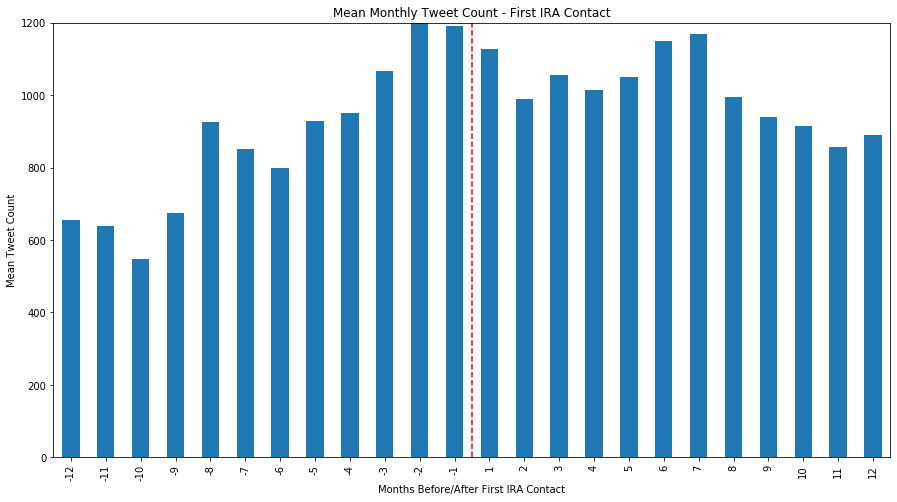

In [44]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year1DF_count.mean().plot(kind='bar', figsize=(15,8),
                            title='Mean Monthly Tweet Count - First IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=1200)
plt.ylabel('Mean Tweet Count')
plt.xlabel('Months Before/After First IRA Contact')
# plt.savefig('BefAft_Infl_DidNotRespond/BefAfmean1_NONRESPONSIVE.png')
# plt.savefig('BefAfmean1_noresponse.png')
plt.show()

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


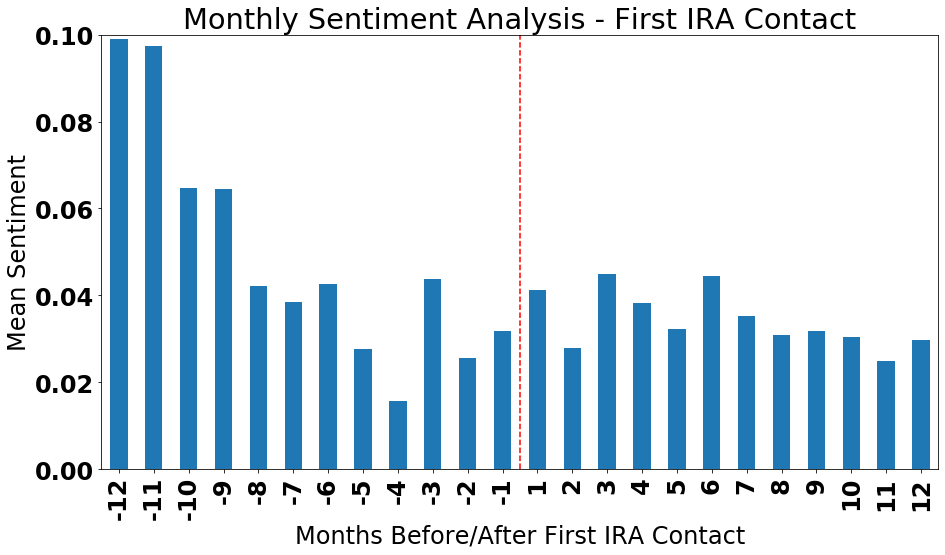

In [45]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year1DF_sent.mean().plot(kind='bar', figsize=(15,8),
                            title='Monthly Sentiment Analysis - First IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylim(top=0.10)
plt.ylabel('Mean Sentiment')
plt.xlabel('Months Before/After First IRA Contact')
# plt.savefig('BefAft_Infl_DidNotRespond/BefAfsent1_NONRESPONSIVE.png')
# plt.savefig('BefAfsent1_noresponse.png')
plt.show()

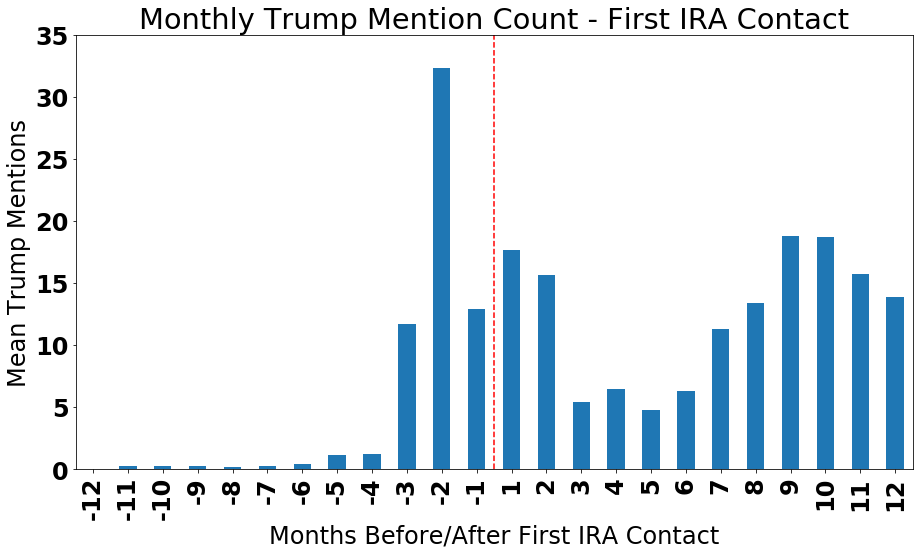

In [46]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year1DF_trump.mean().plot(kind='bar', figsize=(15,8),
                            title='Monthly Trump Mention Count - First IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=35)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.axvline(11.5, color="red", linestyle="--")
plt.ylabel('Mean Trump Mentions')
plt.xlabel('Months Before/After First IRA Contact')
# plt.savefig('BefAft_Infl_DidNotRespond/BefAftrump1_NONRESPONSIVE.png')
# plt.savefig('BefAftrump1_noresponse.png')
plt.show()

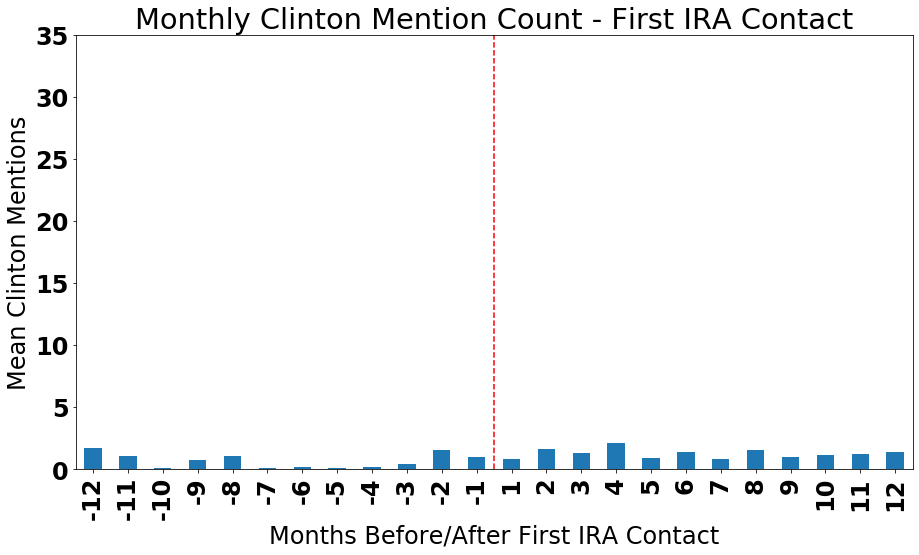

In [47]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year1DF_clinton.mean().plot(kind='bar', figsize=(15,8),
                            title='Monthly Clinton Mention Count - First IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=35)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylabel('Mean Clinton Mentions')
plt.xlabel('Months Before/After First IRA Contact')
# plt.savefig('BefAft_Infl_DidNotRespond/BefAfclinton1_NONRESPONSIVE.png')
# plt.savefig('BefAfclinton1_noresponse.png')
plt.show()

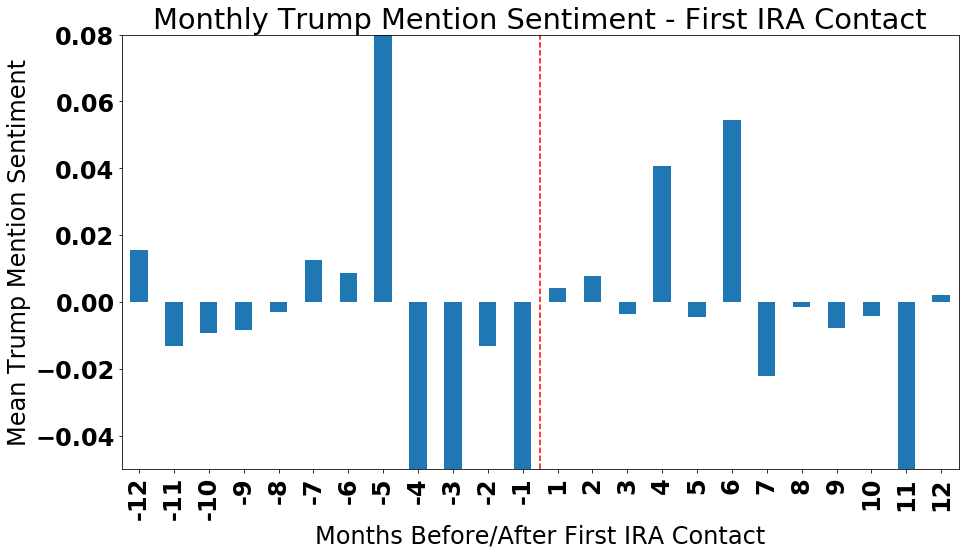

In [48]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year1DF_trump_sent.mean().plot(kind='bar', figsize=(15,8),
                            title='Monthly Trump Mention Sentiment - First IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=.08, bottom=-.05)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 26}
plt.rc('font', **font)
plt.ylabel('Mean Trump Mention Sentiment')
plt.xlabel('Months Before/After First IRA Contact')
# plt.savefig('BefAft_Infl_DidNotRespond/BefAftrump_sent1_NONRESPONSIVE.png')
# plt.savefig('BefAftrump1_noresponse.png')
plt.show()

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


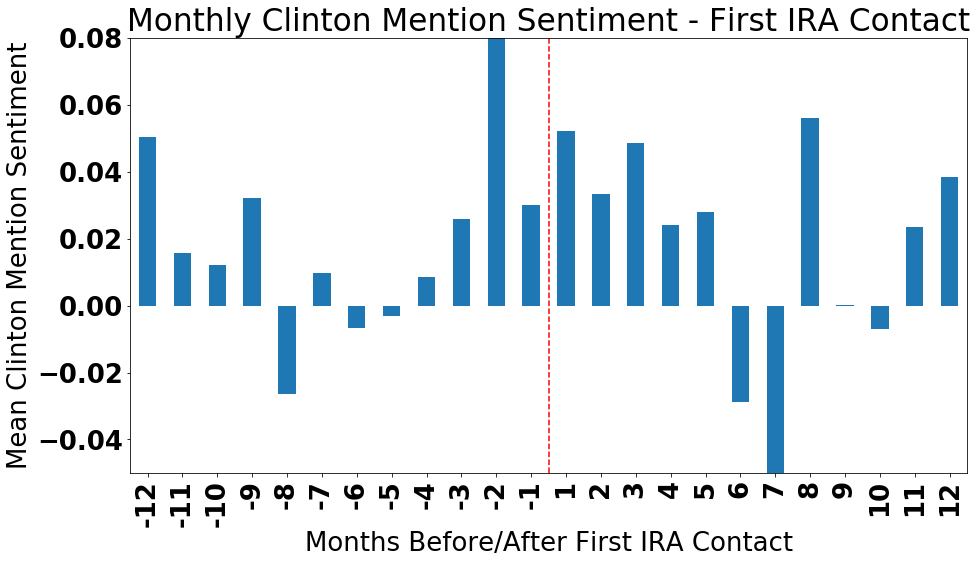

In [49]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year1DF_clinton_sent.mean().plot(kind='bar', figsize=(15,8),
                            title='Monthly Clinton Mention Sentiment - First IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
# plt.ylim(top=25)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=.08, bottom=-.05)
plt.ylabel('Mean Clinton Mention Sentiment')
plt.xlabel('Months Before/After First IRA Contact')
# plt.savefig('BefAft_Infl_DidNotRespond/BefAfclinton_sent1_NONRESPONSIVE.png')
# plt.savefig('BefAftrump1_noresponse.png')
plt.show()

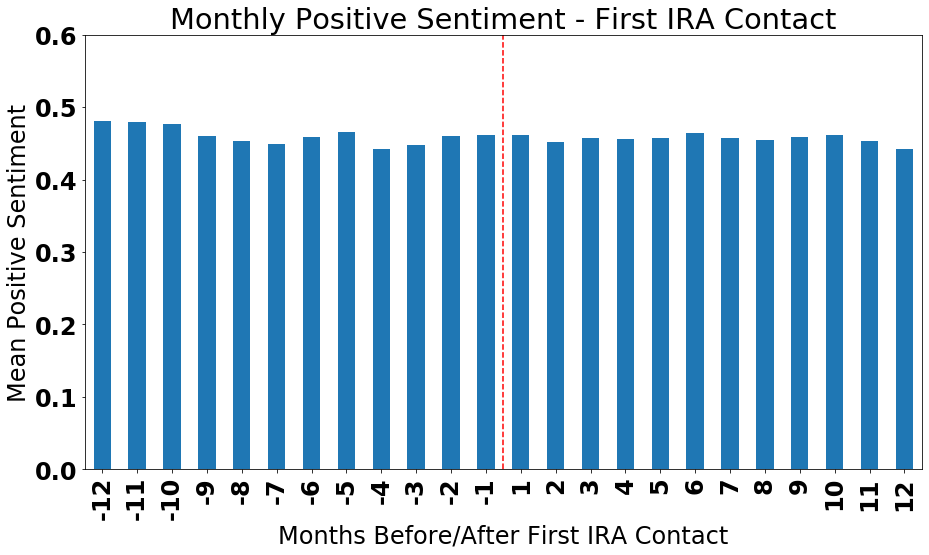

In [50]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year1DF_positive_sent.mean().plot(kind='bar', figsize=(15,8),
                            title='Monthly Positive Sentiment - First IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
# plt.ylim(top=25)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=.6)
plt.ylabel('Mean Positive Sentiment')
plt.xlabel('Months Before/After First IRA Contact')
# plt.savefig('BefAft_Infl_DidNotRespond/BefAfpositive_sent1_NONRESPONSIVE.png')
# plt.savefig('BefAftrump1_noresponse.png')
plt.show()

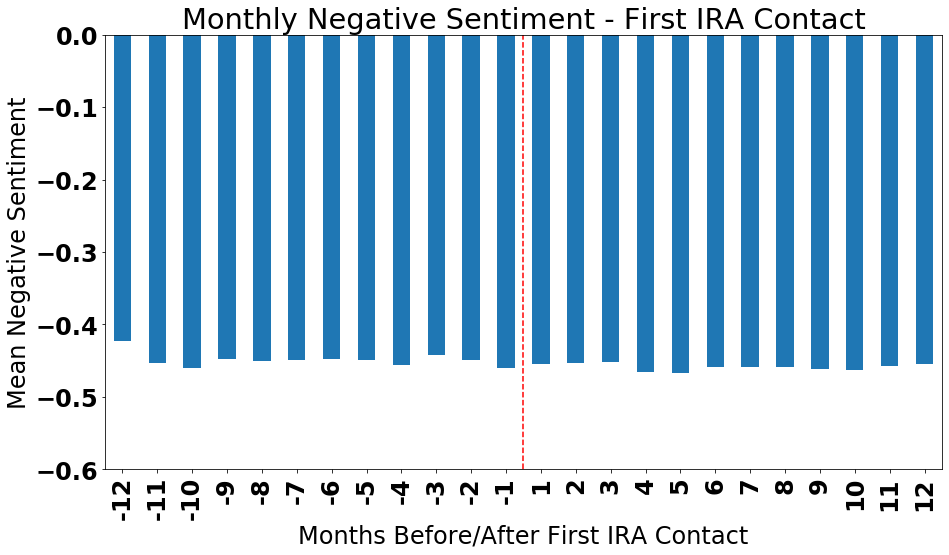

In [51]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year1DF_negative_sent.mean().plot(kind='bar', figsize=(15,8),
                            title='Monthly Negative Sentiment - First IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
# plt.ylim(top=25)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=0, bottom=-.6)
plt.ylabel('Mean Negative Sentiment')
plt.xlabel('Months Before/After First IRA Contact')
# plt.savefig('BefAft_V3_DidNotRespond/BefAfnegative_sent1_NONRESPONSIVE.png')
# plt.savefig('BefAftrump1_noresponse.png')
plt.show()

**Contact Point Two Plots**

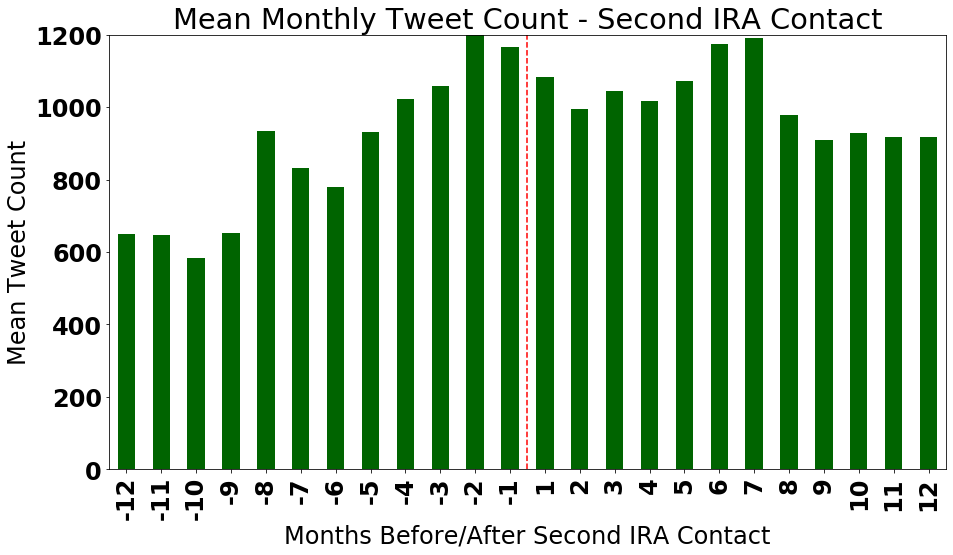

In [52]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year2DF_count.mean().plot(kind='bar', figsize=(15,8), color = 'darkgreen',
                            title='Mean Monthly Tweet Count - Second IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=1200)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylabel('Mean Tweet Count')
plt.xlabel('Months Before/After Second IRA Contact')
# plt.savefig('BefAft_Infl_DidNotRespond/BefAfmean2_NONRESPONSIVE.png')
# plt.savefig('BefAfmean2_noresponse.png')
plt.show()

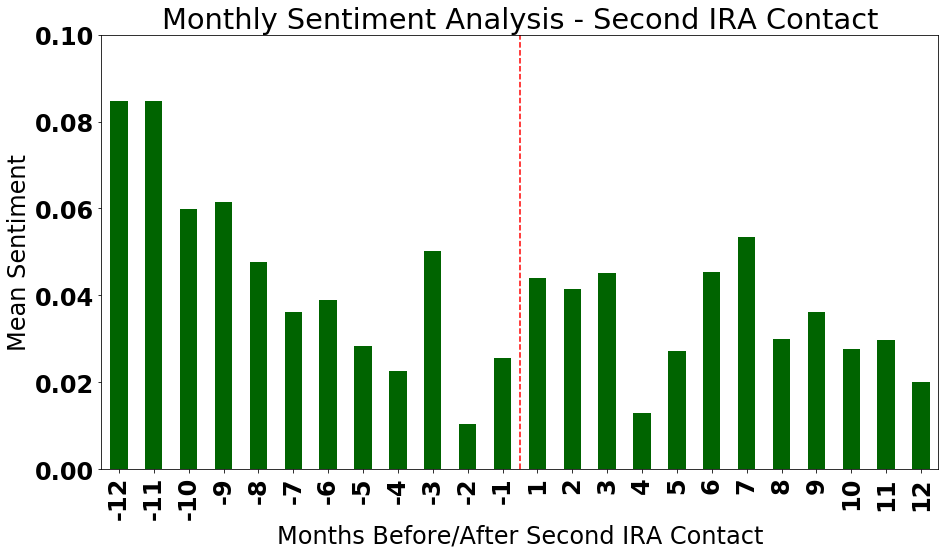

In [53]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year2DF_sent.mean().plot(kind='bar', figsize=(15,8), color ='darkgreen',
                            title='Monthly Sentiment Analysis - Second IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=0.10)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylabel('Mean Sentiment')
plt.xlabel('Months Before/After Second IRA Contact')
# plt.savefig('BefAft_Infl_DidNotRespond/BefAfsent2_NONRESPONSIVE.png')
# plt.savefig('BefAfsent2_noresponse.png')
plt.show()

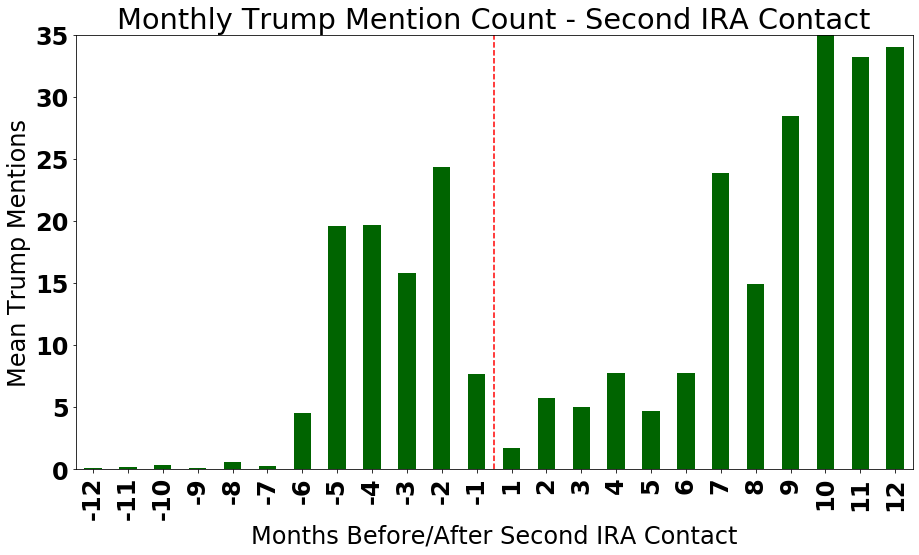

In [54]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year2DF_trump.mean().plot(kind='bar', figsize=(15,8), color='darkgreen',
                            title='Monthly Trump Mention Count - Second IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=35)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylabel('Mean Trump Mentions')
plt.xlabel('Months Before/After Second IRA Contact')
# plt.savefig('BefAft_Infl_DidNotRespond/BefAftrump2_NONRESPONSIVE.png')
# plt.savefig('BefAftrump2_noresponse.png')

plt.show()

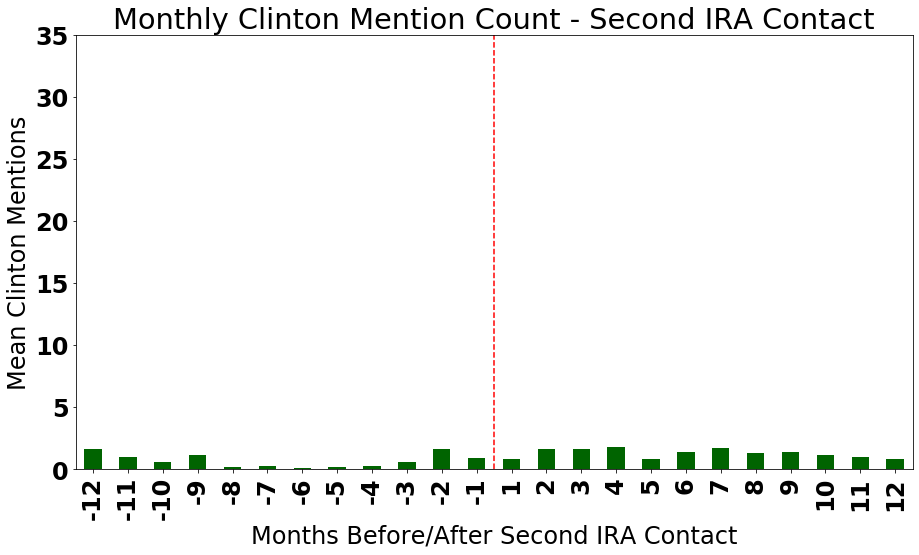

In [55]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year2DF_clinton.mean().plot(kind='bar', figsize=(15,8), color='darkgreen',
                            title='Monthly Clinton Mention Count - Second IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=35)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylabel('Mean Clinton Mentions')
plt.xlabel('Months Before/After Second IRA Contact')
# plt.savefig('BefAft_Infl_DidNotRespond/BefAfclinton2_NONRESPONSIVE.png')
# plt.savefig('BefAfclinton2_noresponse.png')

plt.show()

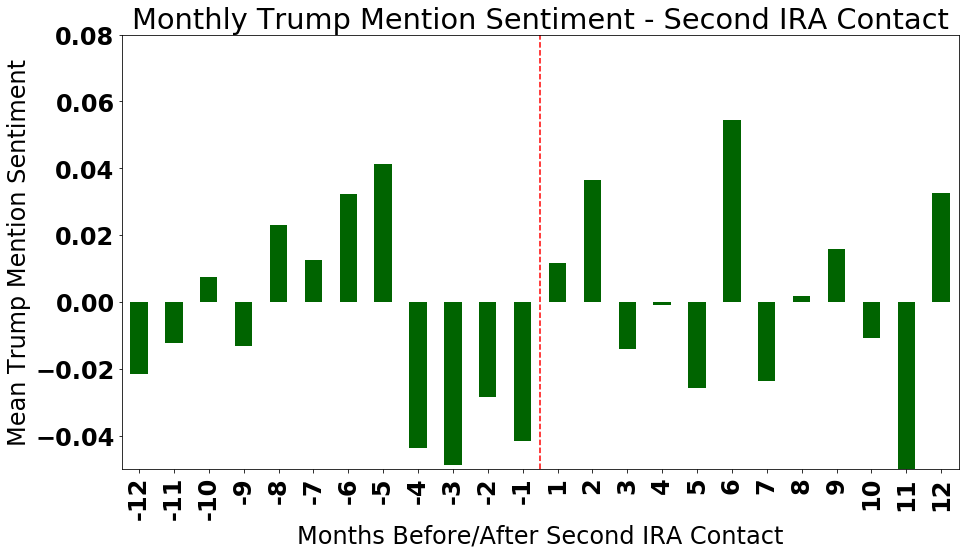

In [56]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year2DF_trump_sent.mean().plot(kind='bar', figsize=(15,8), color='darkgreen',
                            title='Monthly Trump Mention Sentiment - Second IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
# plt.ylim(top=25)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylim(top=.08, bottom=-.05)
plt.ylabel('Mean Trump Mention Sentiment')
plt.xlabel('Months Before/After Second IRA Contact')
# plt.savefig('BefAft_Infl_DidNotRespond/BefAftrump_sent2_NONRESPONSIVE.png')
# plt.savefig('BefAftrump2_noresponse.png')
plt.show()

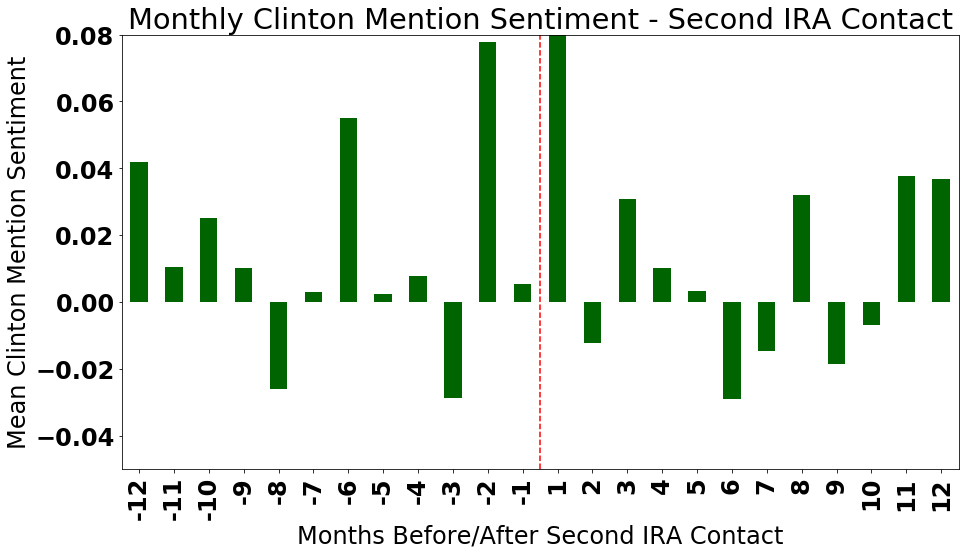

In [57]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year2DF_clinton_sent.mean().plot(kind='bar', figsize=(15,8), color='darkgreen',
                            title='Monthly Clinton Mention Sentiment - Second IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
# plt.ylim(top=25)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylim(top=.08, bottom=-.05)
plt.ylabel('Mean Clinton Mention Sentiment')
plt.xlabel('Months Before/After Second IRA Contact')
# plt.savefig('BefAft_Infl_DidNotRespond/BefAfclinton_sent2_NONRESPONSIVE.png')
# plt.savefig('BefAftrump2_noresponse.png')
plt.show()

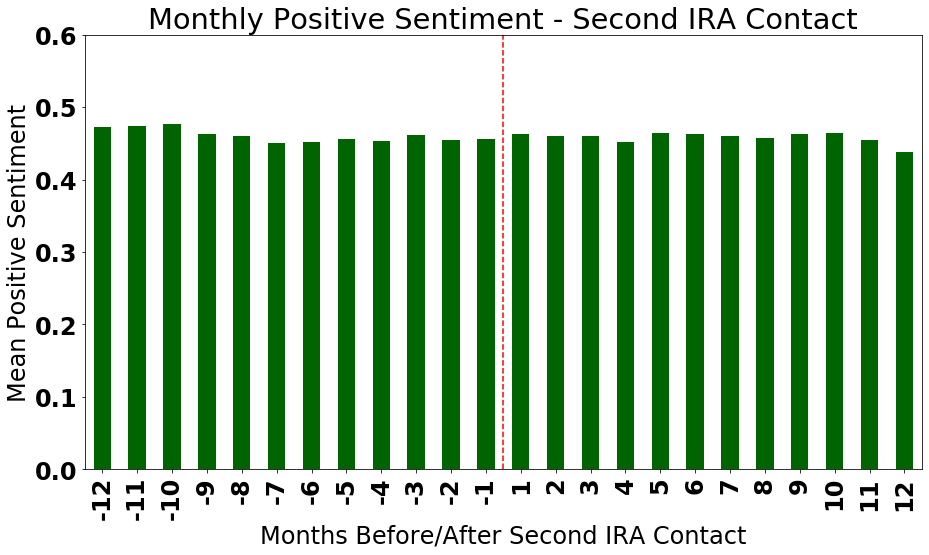

In [58]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year2DF_positive_sent.mean().plot(kind='bar', figsize=(15,8), color='darkgreen',
                            title='Monthly Positive Sentiment - Second IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=.6)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.axvline(11.5, color="red", linestyle="--")
# plt.ylim(top=.06, bottom=-.05)
plt.ylabel('Mean Positive Sentiment')
plt.xlabel('Months Before/After Second IRA Contact')
# plt.savefig('BefAft_V3_DidNotRespond/BefAfpositive_sent2_NONRESPONSIVE.png')
# plt.savefig('BefAftrump1_noresponse.png')
plt.show()

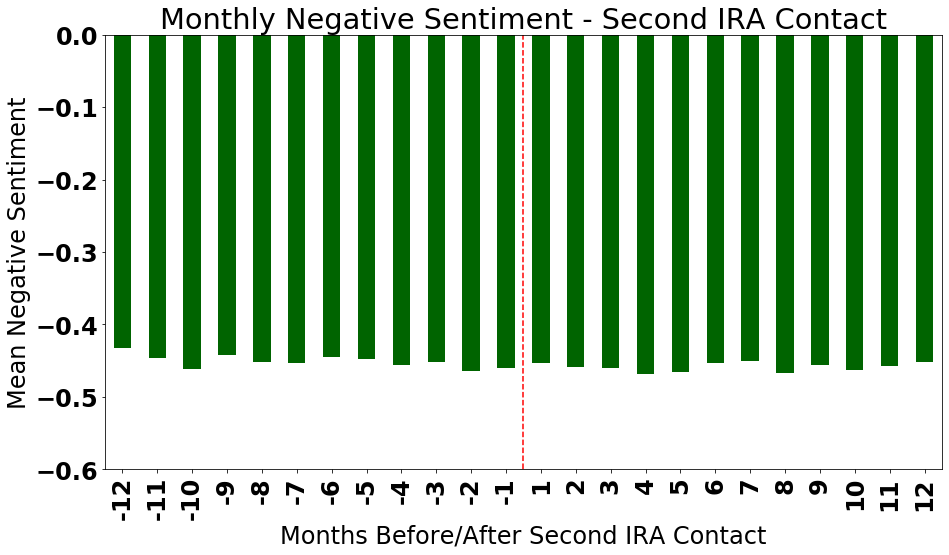

In [59]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year2DF_negative_sent.mean().plot(kind='bar', figsize=(15,8), color='darkgreen',
                            title='Monthly Negative Sentiment - Second IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
# plt.ylim(top=25)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=0, bottom=-.6)
plt.ylabel('Mean Negative Sentiment')
plt.xlabel('Months Before/After Second IRA Contact')
# plt.savefig('BefAft_V3_DidNotRespond/BefAfnegative_sent2_NONRESPONSIVE.png')
# plt.savefig('BefAftrump1_noresponse.png')
plt.show()

**Contact Point Three Plots**

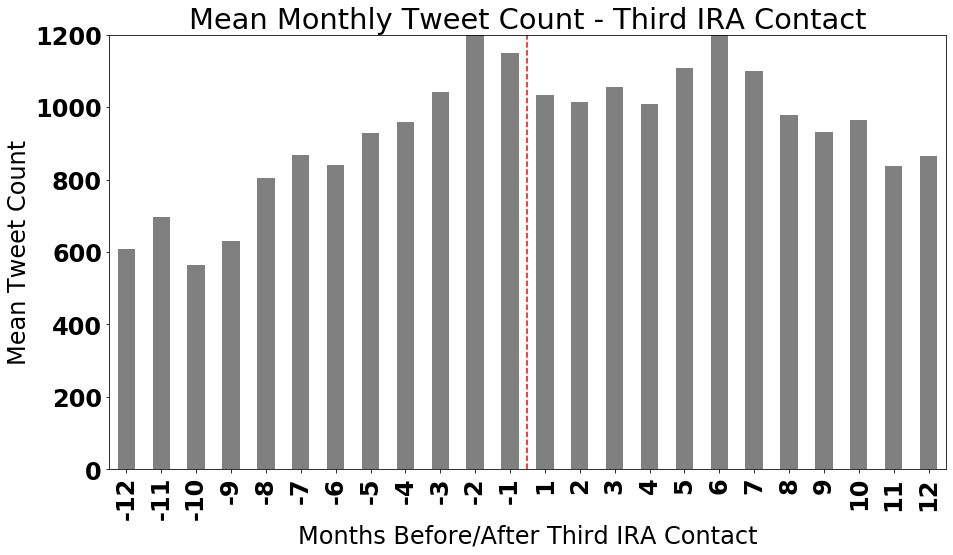

In [60]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year3DF_count.mean().plot(kind='bar', figsize=(15,8), color = 'grey',
                            title='Mean Monthly Tweet Count - Third IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=1200)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylabel('Mean Tweet Count')
plt.xlabel('Months Before/After Third IRA Contact')
# plt.savefig('BefAft_Infl_DidNotRespond/BefAfmean3_NONRESPONSIVE.png')
# plt.savefig('BefAfmean3_noresponse.png')

plt.show()

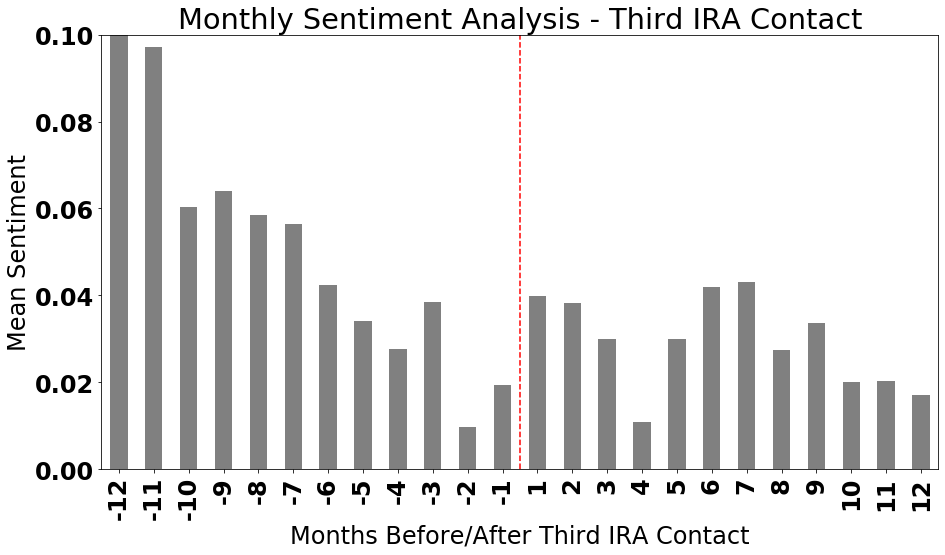

In [61]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year3DF_sent.mean().plot(kind='bar', figsize=(15,8), color ='grey',
                            title='Monthly Sentiment Analysis - Third IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=0.10)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.axvline(11.5, color="red", linestyle="--")
plt.ylabel('Mean Sentiment')
plt.xlabel('Months Before/After Third IRA Contact')
# plt.savefig('BefAft_Infl_DidNotRespond/BefAfsent3_NONRESPONSIVE.png')
# plt.savefig('BefAfsent3_noresponse.png')

plt.show()

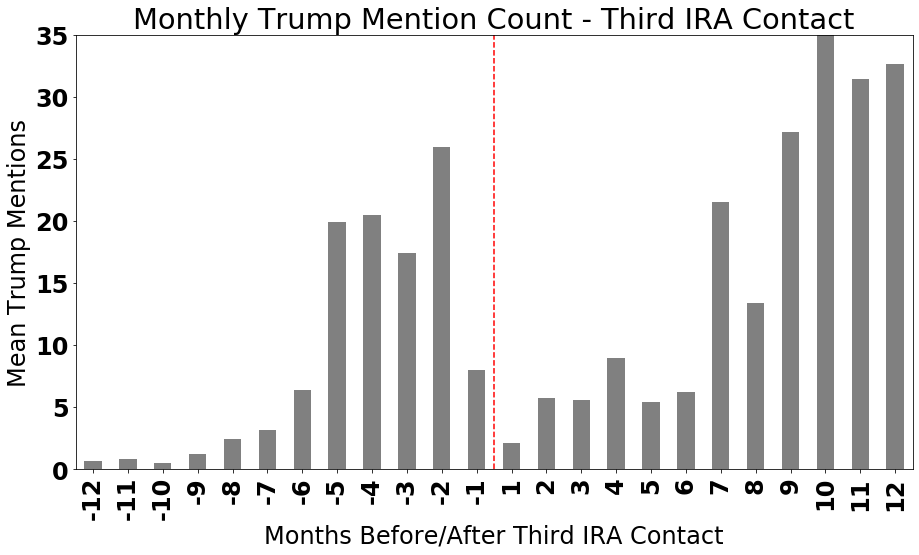

In [62]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year3DF_trump.mean().plot(kind='bar', figsize=(15,8), color='grey',
                            title='Monthly Trump Mention Count - Third IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=35)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylabel('Mean Trump Mentions')
plt.xlabel('Months Before/After Third IRA Contact')
# plt.savefig('BefAft_Infl_DidNotRespond/BefAftrump3_NONRESPONSIVE.png')
# plt.savefig('BefAftrump3_noresponse.png')

plt.show()

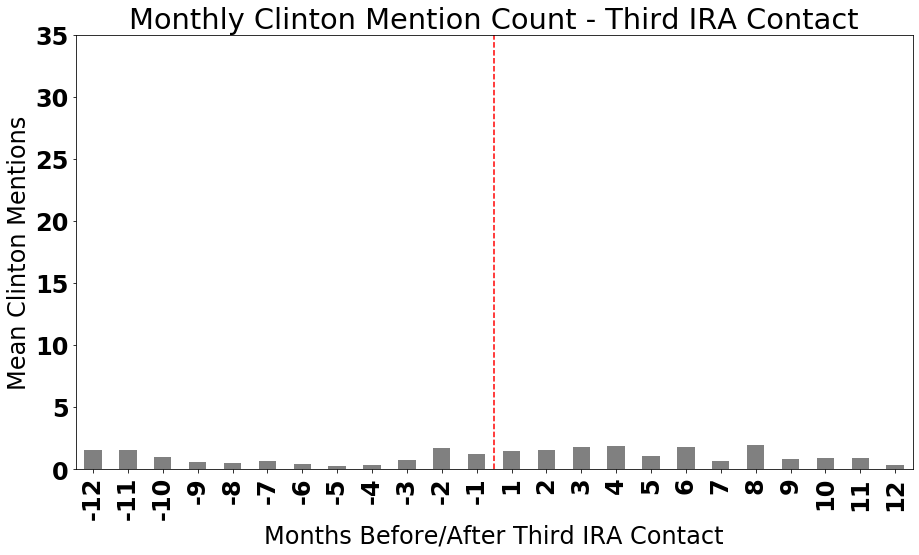

In [63]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year3DF_clinton.mean().plot(kind='bar', figsize=(15,8), color='grey',
                            title='Monthly Clinton Mention Count - Third IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylim(top=35)
plt.ylabel('Mean Clinton Mentions')
plt.xlabel('Months Before/After Third IRA Contact')
# plt.savefig('BefAft_Infl_DidNotRespond/BefAfclinton3_NONRESPONSIVE.png')
# plt.savefig('BefAfclinton3_noresponse.png')

plt.show()

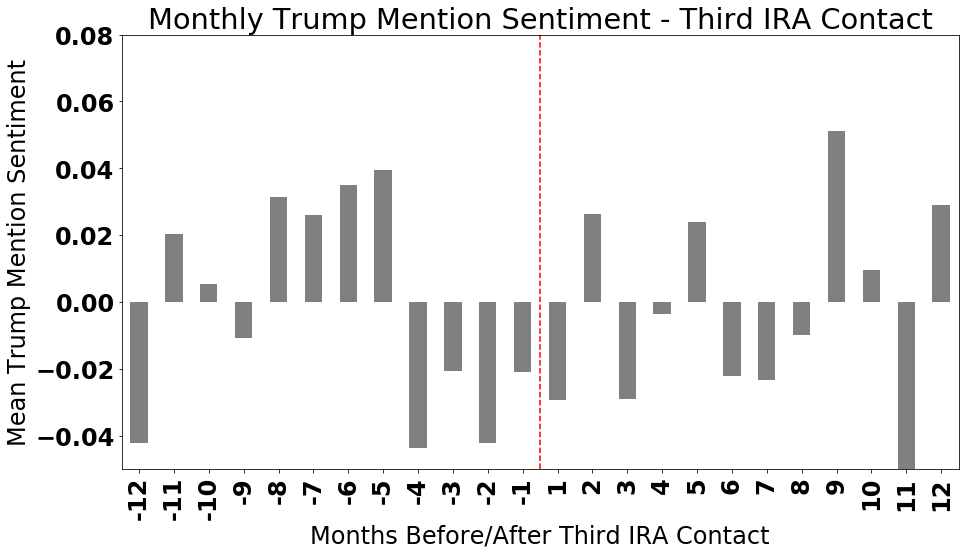

In [64]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year3DF_trump_sent.mean().plot(kind='bar', figsize=(15,8), color='grey',
                            title='Monthly Trump Mention Sentiment - Third IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
# plt.ylim(top=25)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylim(top=.08, bottom=-.05)
plt.ylabel('Mean Trump Mention Sentiment')
plt.xlabel('Months Before/After Third IRA Contact')
# plt.savefig('BefAft_Infl_DidNotRespond/BefAftrump_sent3_NONRESPONSIVE.png')
# plt.savefig('BefAftrump3_noresponse.png')

plt.show()

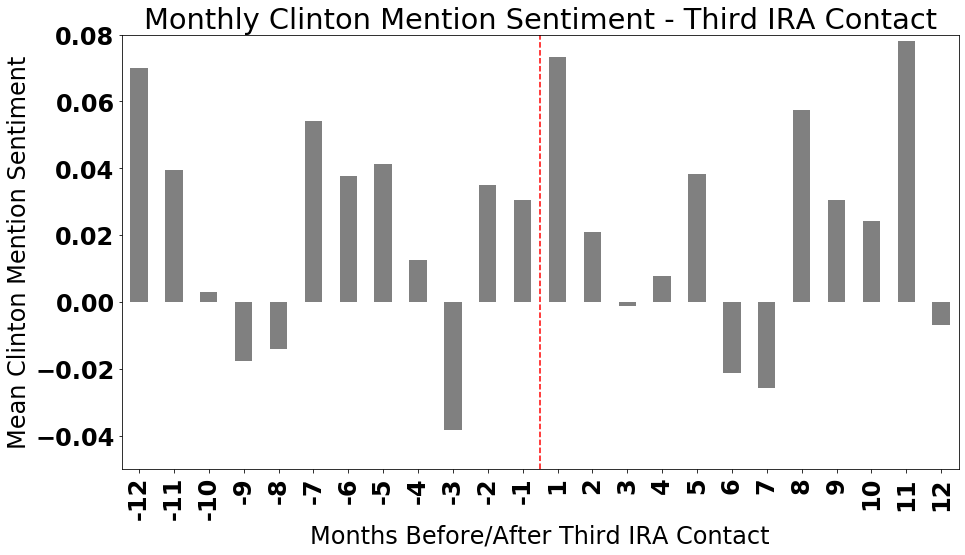

In [65]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year3DF_clinton_sent.mean().plot(kind='bar', figsize=(15,8), color='grey',
                            title='Monthly Clinton Mention Sentiment - Third IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
# plt.ylim(top=25)
plt.ylim(top=.08, bottom=-.05)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylabel('Mean Clinton Mention Sentiment')
plt.xlabel('Months Before/After Third IRA Contact')
# plt.savefig('BefAft_Infl_DidNotRespond/BefAfclinton_sent3_NONRESPONSIVE.png')
# plt.savefig('BefAftrump3_noresponse.png')

plt.show()

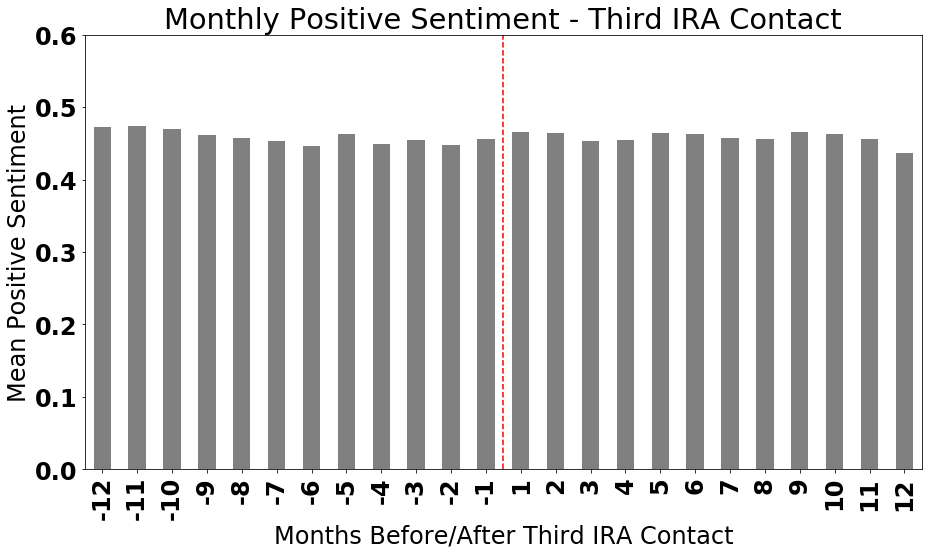

In [66]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year3DF_positive_sent.mean().plot(kind='bar', figsize=(15,8), color='grey',
                            title='Monthly Positive Sentiment - Third IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
# plt.ylim(top=25)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=.6)
plt.ylabel('Mean Positive Sentiment')
plt.xlabel('Months Before/After Third IRA Contact')
# plt.savefig('BefAft_V3_DidNotRespond/BefAfpositive_sent3_NONRESPONSIVE.png')
# plt.savefig('BefAftrump1_noresponse.png')
plt.show()

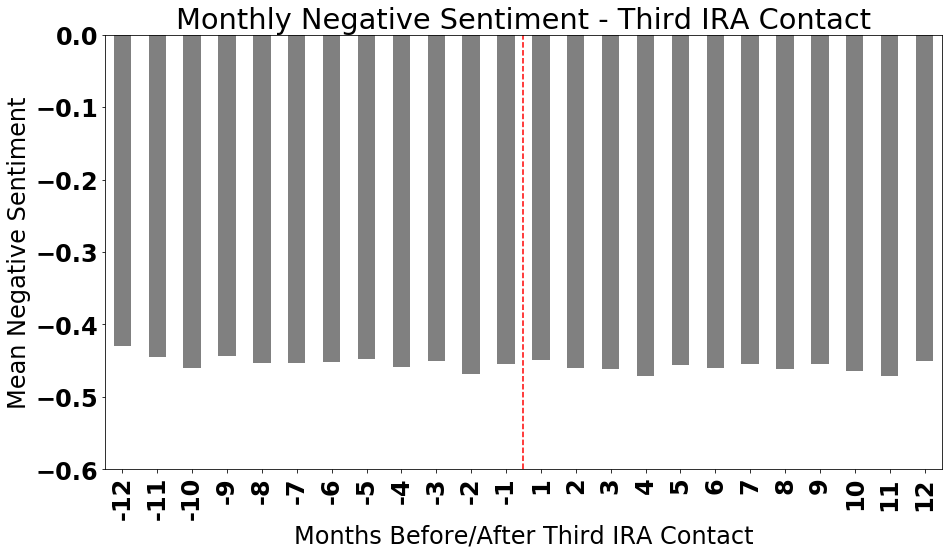

In [67]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year3DF_negative_sent.mean().plot(kind='bar', figsize=(15,8), color='grey',
                            title='Monthly Negative Sentiment - Third IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
# plt.ylim(top=25)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=0, bottom=-.6)
plt.ylabel('Mean Negative Sentiment')
plt.xlabel('Months Before/After Third IRA Contact')
# plt.savefig('BefAft_V3_DidNotRespond/BefAfnegative_sent3_NONRESPONSIVE.png')
# plt.savefig('BefAftrump1_noresponse.png')
plt.show()


In [68]:
# beforeAfterDF.head()
# befAftCounts.head()

In [69]:
# count = 0
# remove_users = []
# for i in range(len(beforeAfterDF)):
# # for i in range(10):
#     first_contact = beforeAfterDF['first_contact'][i]
#     first_tweety = dt.strptime(first_tweet_dict[beforeAfterDF['username'][i]], "%Y-%m-%d")
#     if first_tweety >= first_contact:
#         remove_users.append(beforeAfterDF['username'][i])
# #         print(beforeAfterDF['username'][i])
# #         print(first_tweety)
# #         print(first_contact)
#         count += 1
# print(count)
    

In [70]:
# removeDF = pd.DataFrame(remove_users)

In [71]:
# removeDF.columns = ['username']

In [72]:
# removeDF.head()

In [73]:
# removeDF.to_csv('removeUsers_DidNotMentionBackUsers.csv')